In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import statsmodels.formula.api as smf
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display, Markdown, Latex
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from scipy.stats import zscore

## Additional Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# Metrics
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Lasso, Elastic Net, Ridge
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, precision_score

# Importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import seaborn as sns
# Libraries for constructing Pipelines
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from prettytable import PrettyTable

In [ ]:
##load data
#data = pd.read_csv("ad (1).csv")
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/My Drive/ad (1).csv")
data.head()

Mounted at /content/drive


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [ ]:
data = data.rename(columns={"Clicked on Ad": "click"})
data = data.rename(columns={"Daily Time Spent on Site": "DailyTime_Spent_on_Site"})
data = data.rename(columns={"Area Income": "Area_Income"})
data = data.rename(columns={"Daily Internet Usage": "Daily_Internet_Usage"})
data = data.rename(columns={"Ad Topic Line": "Ad_Topic_Line"})

# 1. Data Description

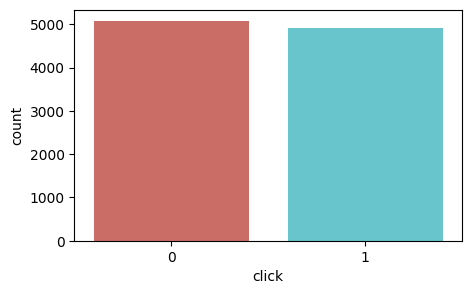

In [ ]:
plt.figure(figsize=(5, 3))
sns.countplot(x='click',data=data, palette='hls')
plt.show();

In [ ]:
data['click'].value_counts()

,count
click,
0,5083
1,4917


In [ ]:
data['click'].value_counts()/len(data)
# The overall click through rate is approx. 49%, and approx. 51% is not clicked.

,count
click,
0,0.5083
1,0.4917


In [ ]:
data.nunique().sort_values(ascending=False)

,0
Timestamp,567
Ad_Topic_Line,559
Area_Income,524
City,521
Daily_Internet_Usage,505
DailyTime_Spent_on_Site,460
Country,207
Age,39
Gender,2
click,2


In [ ]:
data.isnull().sum()
# without null

,0
DailyTime_Spent_on_Site,0
Age,0
Area_Income,0
Daily_Internet_Usage,0
Ad_Topic_Line,0
City,0
Gender,0
Country,0
Timestamp,0
click,0


In [ ]:
# data type
data.Timestamp=pd.to_datetime(data.Timestamp)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   DailyTime_Spent_on_Site  10000 non-null  float64       
 1   Age                      10000 non-null  float64       
 2   Area_Income              10000 non-null  float64       
 3   Daily_Internet_Usage     10000 non-null  float64       
 4   Ad_Topic_Line            10000 non-null  object        
 5   City                     10000 non-null  object        
 6   Gender                   10000 non-null  object        
 7   Country                  10000 non-null  object        
 8   Timestamp                10000 non-null  datetime64[ns]
 9   click                    10000 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 781.4+ KB


In [ ]:
data.Ad_Topic_Line

,Ad_Topic_Line
0,Decentralized real-time circuit
1,Optional full-range projection
2,Total 5thgeneration standardization
3,Balanced empowering success
4,Total 5thgeneration standardization
...,...
9995,Profound executive flexibility
9996,Managed zero tolerance concept
9997,Intuitive exuding service-desk
9998,Realigned content-based leverage


In [ ]:
data.Gender

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female
...,...
9995,Male
9996,Male
9997,Female
9998,Female


In [ ]:
data1 = data.copy()

In [ ]:
data1['Gender'] = data1['Gender'].map({'Male':0, 'Female':1})
data1

,DailyTime_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic_Line,City,Gender,Country,Timestamp,click
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,0,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,0,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,1,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,1,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,1,Qatar,2016-07-21 10:54:35,1
...,...,...,...,...,...,...,...,...,...,...
9995,41.73,31.0,61840.26,207.17,Profound executive flexibility,West Angelabury,0,Singapore,2016-01-03 03:22:15,1
9996,41.73,28.0,51501.38,120.49,Managed zero tolerance concept,Kennedyfurt,0,Luxembourg,2016-05-28 12:20:15,0
9997,55.60,39.0,38067.08,124.44,Intuitive exuding service-desk,North Randy,1,Egypt,2016-01-05 11:53:17,0
9998,46.61,50.0,43974.49,123.13,Realigned content-based leverage,North Samantha,1,Malawi,2016-04-04 07:07:46,1


## 1.1 EDA of the numeric features

In [ ]:
df_num = data.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,DailyTime_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,click
0,62.26,32.0,69481.85,172.83,0
1,41.73,31.0,61840.26,207.17,0
2,44.40,30.0,57877.15,172.83,0
3,59.88,28.0,56180.93,207.17,0
4,49.21,30.0,54324.73,201.58,1


In [ ]:
df_num1 = data1.select_dtypes(include = ['float64', 'int64'])
df_num1.head()

,DailyTime_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Gender,click
0,62.26,32.0,69481.85,172.83,0,0
1,41.73,31.0,61840.26,207.17,0,0
2,44.40,30.0,57877.15,172.83,1,0
3,59.88,28.0,56180.93,207.17,1,0
4,49.21,30.0,54324.73,201.58,1,1


### 1.1.1 Boxplot

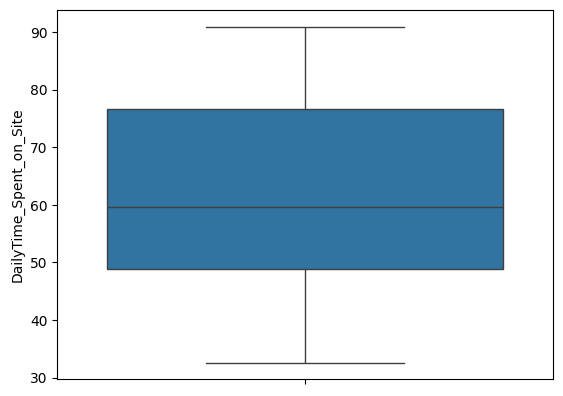

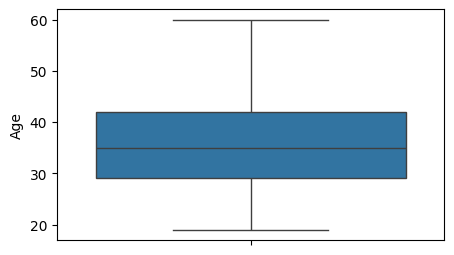

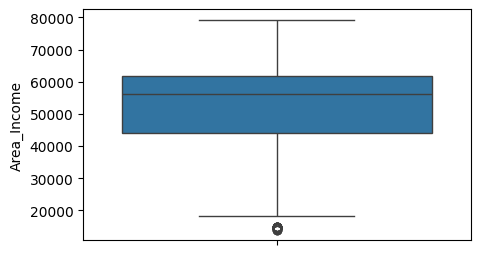

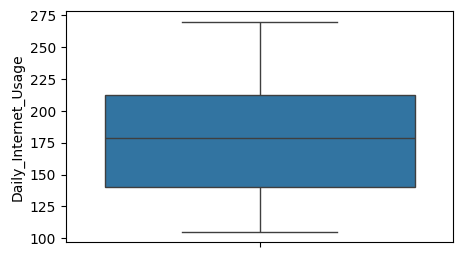

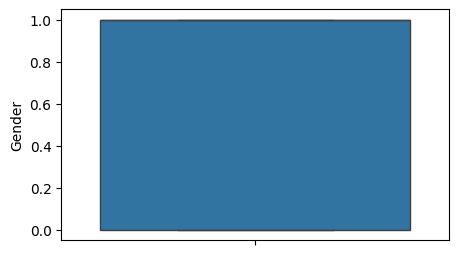

<Figure size 500x300 with 0 Axes>

In [ ]:
# boxplot
for i in ['DailyTime_Spent_on_Site','Age','Area_Income','Daily_Internet_Usage','Gender']:
  plt.figsize=(10,5)
  sns.boxplot(y=data1[i])
  plt.show()
  plt.figure(figsize=(5, 3))

### 1.1.2 Displot

array([[<Axes: title={'center': 'DailyTime_Spent_on_Site'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Area_Income'}>,
        <Axes: title={'center': 'Daily_Internet_Usage'}>],
       [<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'click'}>]], dtype=object)

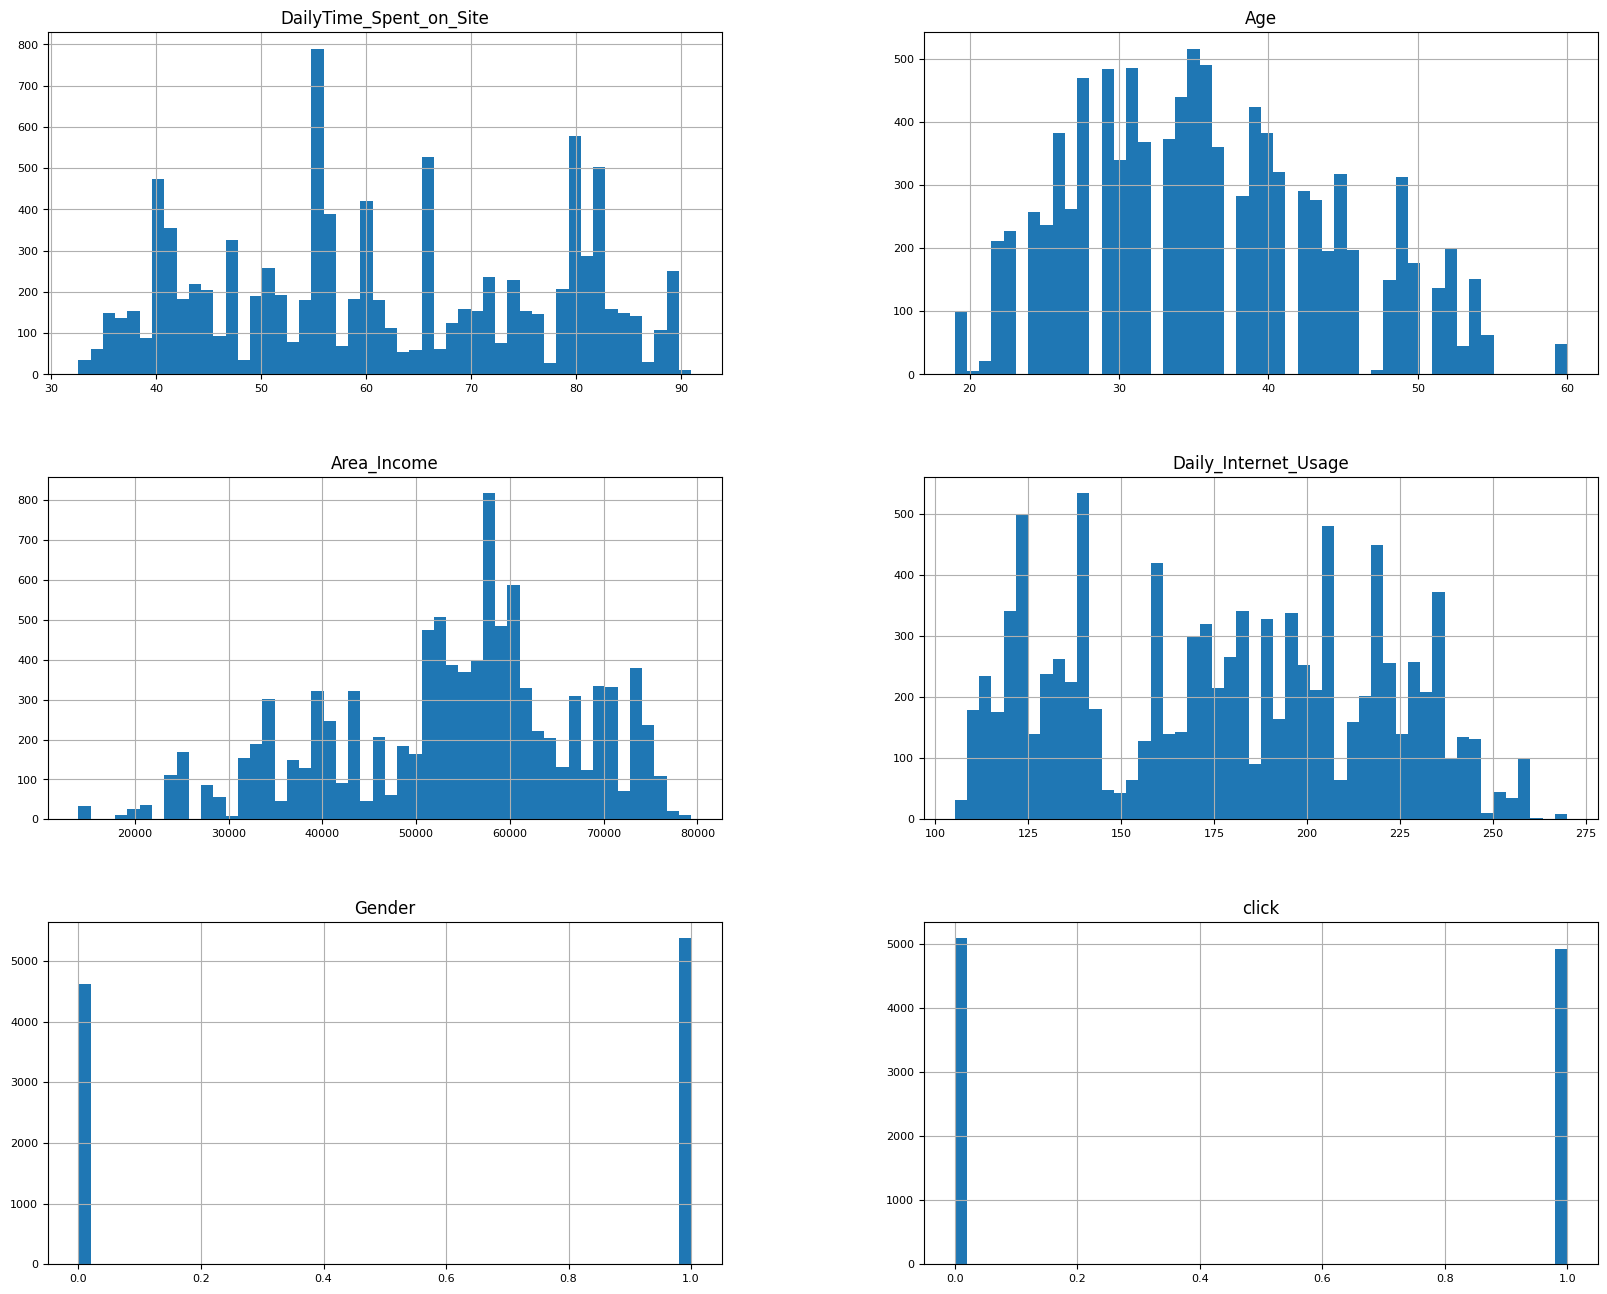

In [ ]:
# displot
df_num1.hist(figsize=(20, 16), bins=50, xlabelsize=8, ylabelsize=8)

### 1.1.3 Correlation

Now we'll try to find which features are strongly correlated with click.

In [ ]:
df_num_corr = df_num1.corr()['click'][:-1] # -1 because the latest row is click
features_list = df_num_corr[abs(df_num_corr) > 0].sort_values(ascending=False)
print(features_list)

Age                        0.460383
DailyTime_Spent_on_Site    0.091034
Gender                     0.049596
Area_Income               -0.067631
Daily_Internet_Usage      -0.129412
Name: click, dtype: float64


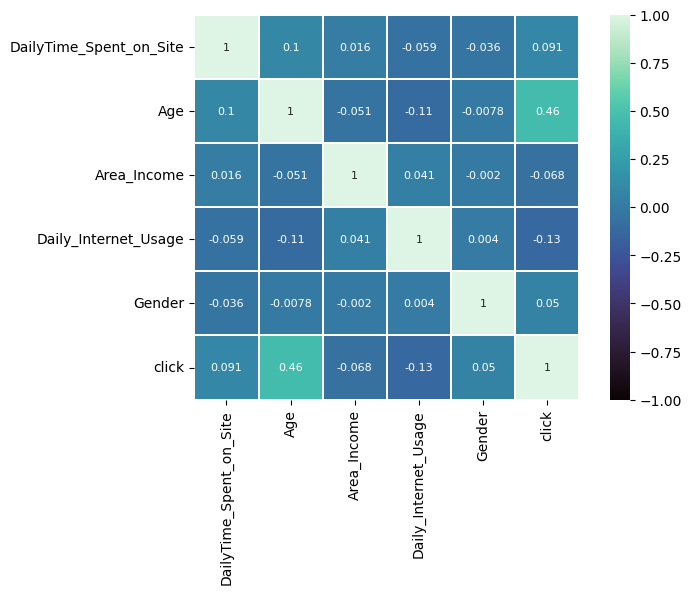

In [ ]:
corr = df_num1.corr()
plt.figure(figsize=(8, 5))

sns.heatmap(corr[(corr >= 0) | (corr <= 0)],
            cmap='mako', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

## 1.2 EDA of the date features

In [ ]:
data.Timestamp .describe()
# The data covers about 7 months of click streams data from 2016-01-01 to 2016-07-23.

,Timestamp
count,10000
mean,2016-04-10 16:54:37.815200256
min,2016-01-01 02:52:10
25%,2016-02-26 01:18:44
50%,2016-04-04 22:00:15
75%,2016-06-02 21:02:22
max,2016-07-23 11:46:28


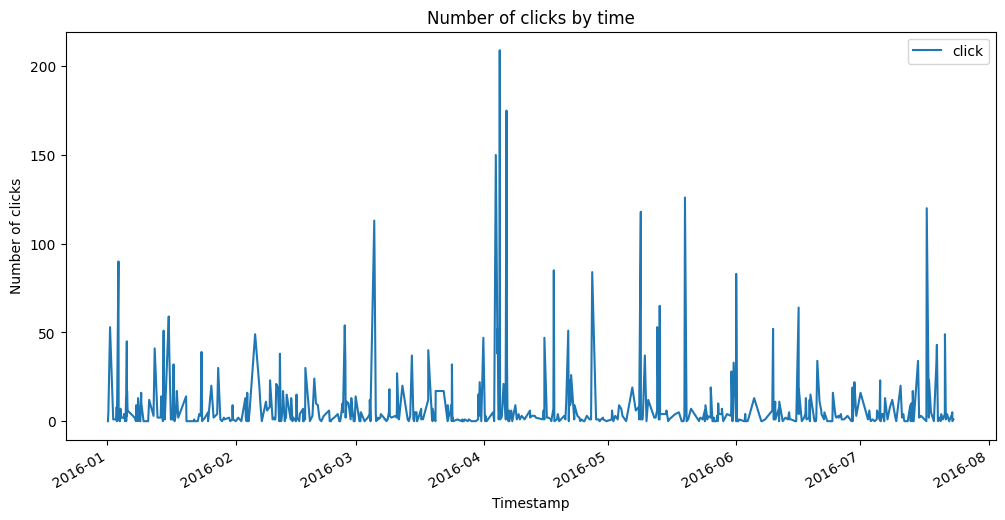

<Figure size 800x600 with 0 Axes>

In [ ]:
data.groupby('Timestamp').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by time')
plt.figure(figsize=(8, 6)) ;
# It seems there were a couple of peak days in each month.

### 1.2.1 Feature engineering for date time features

#### 1.2.1.1 Day of month feature

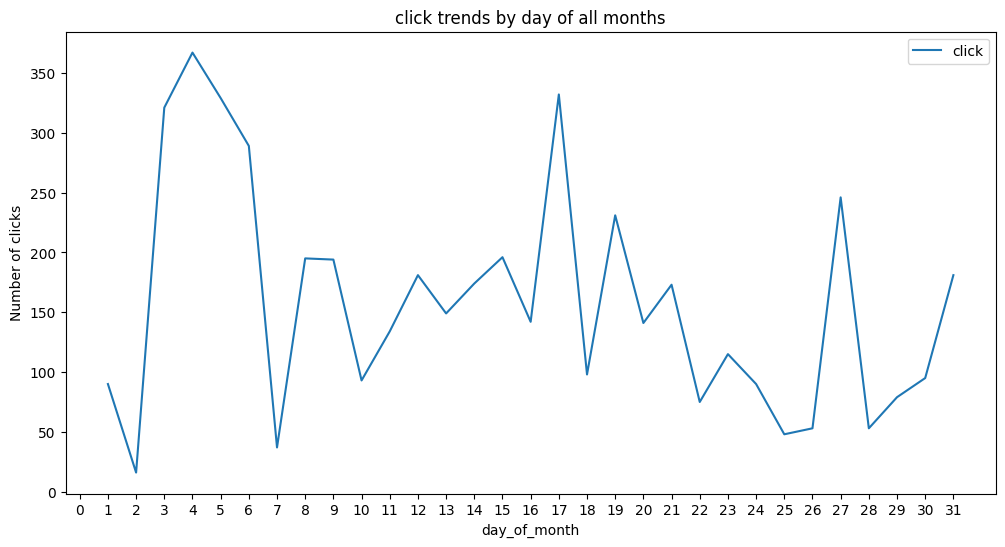

<Figure size 500x300 with 0 Axes>

In [ ]:
# Extract hour from date time feature
data_time = data.copy()
data_time['day_of_month'] = data_time.Timestamp.apply(lambda x: x.day)
data_time.groupby('day_of_month').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('click trends by day of all months')
my_x_ticks = np.arange(0, 32, 1)
plt.xticks(my_x_ticks)
plt.figure(figsize=(5, 3))
plt.show()

In general, the highest number of clicks is at 4, 17, 27 day of each month, and the least number of clicks is at 2nd day. It seems a useful feature for roughly estimation.

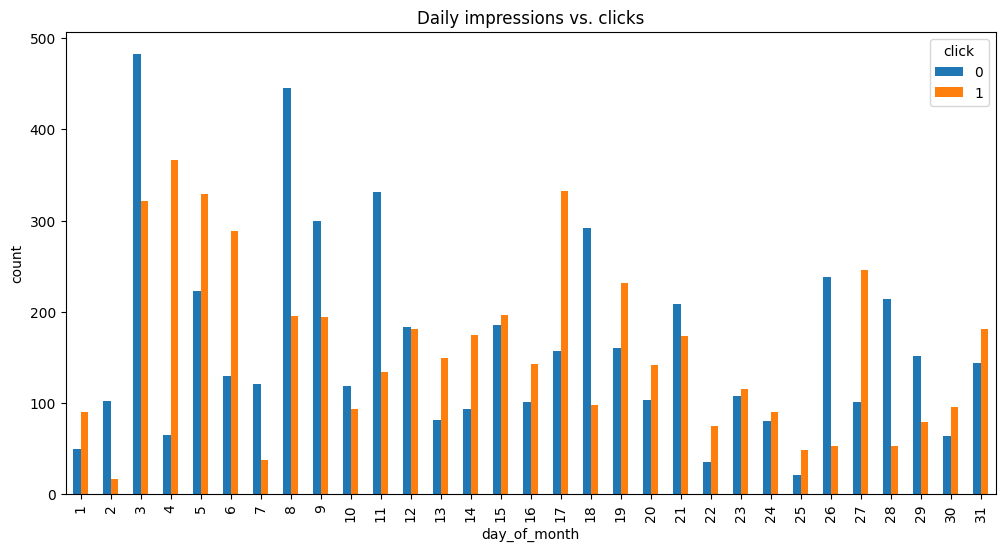

In [ ]:
data_time.groupby(['day_of_month', 'click']).size().unstack().plot(kind='bar', title="Day of Month", figsize=(12,6))
plt.ylabel('count')
plt.title('Daily impressions vs. clicks');

In 4, 5, 6, 13, 14, 15, 16, 17, 19, 20, 22, 23, 24, 25, 27, 31, the count of click is larger than not click.

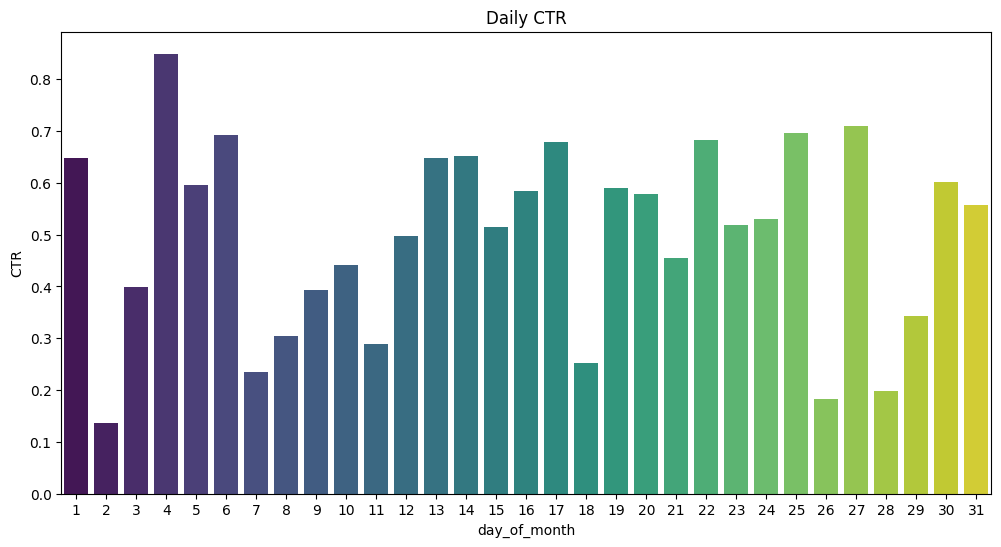

In [ ]:
# Daily CTR
df_click = data_time[data_time['click'] == 1]
df_day = data_time[['day_of_month','click']].groupby(['day_of_month']).count().reset_index()
df_day = df_day.rename(columns={'click': 'impressions'})
df_day['clicks'] = df_click[['day_of_month','click']].groupby(['day_of_month']).count().reset_index()['click']
df_day['CTR'] = df_day['clicks']/df_day['impressions']#*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='day_of_month', data=df_day, palette="viridis")
plt.title('Daily CTR');

The highest CTR happened in the day of 4, 27, 25, 6, 17, 22. From the previous figure, we find that around day 4, 17, 27 have the largest number of impressions and clicks.

#### 1.2.1.2 Hour of Day

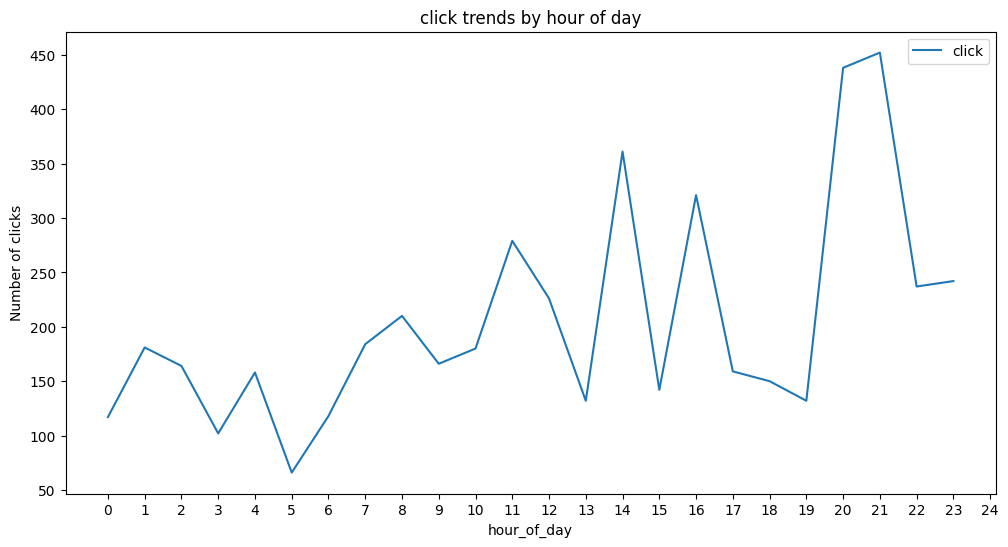

In [ ]:
data_time['hour_of_day'] = data_time.Timestamp.apply(lambda x: x.hour)
data_time.groupby('hour_of_day').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('click trends by hour of day')
my_x_ticks = np.arange(0, 25, 1)
plt.xticks(my_x_ticks)
plt.show()

In general, the highest number of clicks is at hour 20 and 21 (8pm and 9pm), and the least number of clicks is at hour 5. It seems a useful feature for roughly estimation.

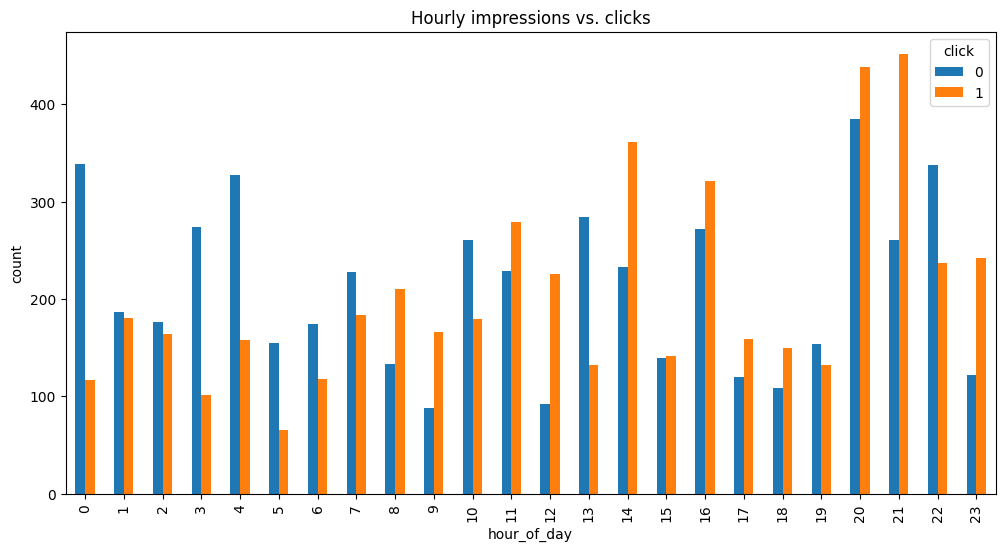

In [ ]:
data_time.groupby(['hour_of_day', 'click']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
plt.ylabel('count')
plt.title('Hourly impressions vs. clicks');

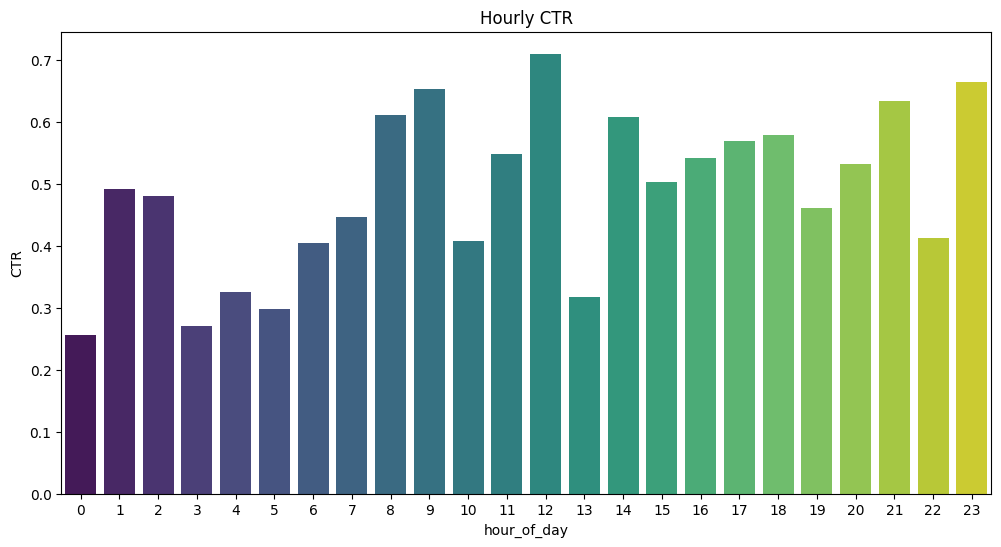

In [ ]:
# Hourly CTR
df_click = data_time[data_time['click'] == 1]
df_hour = data_time[['hour_of_day', 'click']].groupby(['hour_of_day']).count().reset_index()
df_hour = df_hour.rename(columns={'click': 'impressions'})
df_hour['clicks'] = df_click[['hour_of_day', 'click']].groupby(['hour_of_day']).count().reset_index()['click']
df_hour['CTR'] = df_hour['clicks'] / df_hour['impressions']

plt.figure(figsize=(12, 6))
sns.barplot(y='CTR', x='hour_of_day', data=df_hour, palette="viridis")
plt.title('Hourly CTR')
plt.show()

One of the interesting observations here is that the highest CTR happened in the hour of noon, 21, and 23. It is a little different of the result of click counts.

## 1.3 EDA of the categorical features

In [ ]:
cat_data = data.select_dtypes(include=['object']).copy()
cat_data = pd.DataFrame(data, columns=['City','Country',"Gender"])
cat_data

,City,Country,Gender
0,Lisafort,Svalbard & Jan Mayen Islands,Male
1,West Angelabury,Singapore,Male
2,Reyesfurt,Guadeloupe,Female
3,New Michael,Zambia,Female
4,West Richard,Qatar,Female
...,...,...,...
9995,West Angelabury,Singapore,Male
9996,Kennedyfurt,Luxembourg,Male
9997,North Randy,Egypt,Female
9998,North Samantha,Malawi,Female


In [ ]:
print(cat_data['City'].value_counts())

City
Hubbardmouth       336
West Brandonton    275
Lisafort           261
Wintersfort        230
Stewartbury        207
                  ... 
Lake Allenville      1
Hughesport           1
North Frankstad      1
Cunninghamhaven      1
Davidview            1
Name: count, Length: 521, dtype: int64


In [ ]:
print(cat_data['Country'].value_counts())

Country
Australia           388
Czech Republic      330
Turkey              312
Qatar               224
Hong Kong           221
                   ... 
Paraguay              1
Mozambique            1
Saint Barthelemy      1
Suriname              1
Haiti                 1
Name: count, Length: 207, dtype: int64


### 1.3.1 Encoding Categorical Data

One-hot encoding converts the unique categories to binary features

In [ ]:
cat_data_onehot = cat_data.copy()
cat_data_onehot = pd.get_dummies(cat_data_onehot, columns=['City','Country','Gender'], prefix = ['City','Country',"Gender"])

print(cat_data_onehot.head())

   City_Alexanderfurt  City_Alexandrafort  City_Amandahaven  City_Amyfurt  \
0               False               False             False         False   
1               False               False             False         False   
2               False               False             False         False   
3               False               False             False         False   
4               False               False             False         False   

   City_Andersonfurt  City_Andrewborough  City_Andrewmouth  City_Angelhaven  \
0              False               False             False            False   
1              False               False             False            False   
2              False               False             False            False   
3              False               False             False            False   
4              False               False             False            False   

   City_Anthonyfurt  City_Austinland  ...  Country_Uzbekistan 

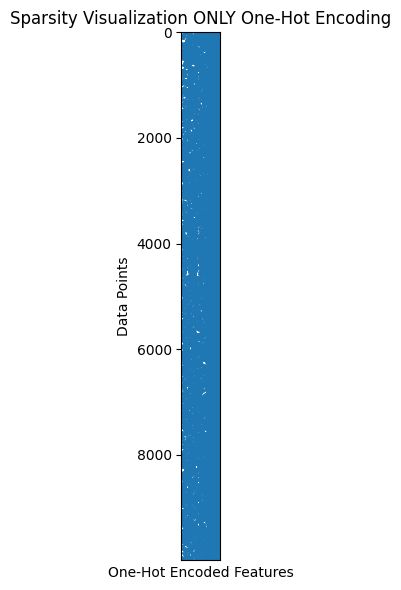

In [ ]:
# Plot sparsity using spy
plt.figure(figsize=(12, 6))
plt.spy(cat_data_onehot, markersize=1)
plt.title("Sparsity Visualization ONLY One-Hot Encoding")
plt.xlabel("One-Hot Encoded Features")
plt.ylabel("Data Points")
plt.xticks([])
plt.tight_layout()
plt.show()

In [ ]:
# combining New dummified and Numerical columns
noncat_data = pd.DataFrame(data, columns=['DailyTime_Spent_on_Site', 'Age', 'Area_Income', 'Daily_Internet_Usage', 'Timestamp', 'click', 'Ad_Topic_Line'])
data_new = pd.concat([cat_data_onehot, noncat_data],axis=1)
data_new

,City_Alexanderfurt,City_Alexandrafort,City_Amandahaven,City_Amyfurt,City_Andersonfurt,City_Andrewborough,City_Andrewmouth,City_Angelhaven,City_Anthonyfurt,City_Austinland,...,Country_Zimbabwe,Gender_Female,Gender_Male,DailyTime_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Timestamp,click,Ad_Topic_Line
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,62.26,32.0,69481.85,172.83,2016-06-09 21:43:05,0,Decentralized real-time circuit
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,41.73,31.0,61840.26,207.17,2016-01-16 17:56:05,0,Optional full-range projection
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,44.40,30.0,57877.15,172.83,2016-06-29 10:50:45,0,Total 5thgeneration standardization
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,59.88,28.0,56180.93,207.17,2016-06-21 14:32:32,0,Balanced empowering success
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,49.21,30.0,54324.73,201.58,2016-07-21 10:54:35,1,Total 5thgeneration standardization
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,True,41.73,31.0,61840.26,207.17,2016-01-03 03:22:15,1,Profound executive flexibility
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,True,41.73,28.0,51501.38,120.49,2016-05-28 12:20:15,0,Managed zero tolerance concept
9997,False,False,False,False,False,False,False,False,False,False,...,False,True,False,55.60,39.0,38067.08,124.44,2016-01-05 11:53:17,0,Intuitive exuding service-desk
9998,False,False,False,False,False,False,False,False,False,False,...,False,True,False,46.61,50.0,43974.49,123.13,2016-04-04 07:07:46,1,Realigned content-based leverage


In [ ]:
y = data_new['click']
X = data_new.copy()
X = data_new.drop(['click'], axis=1)

In [ ]:
data_base = data_new.copy()
data_base = data_base.drop(['Timestamp'], axis=1)
data_base = data_base.drop(['Ad_Topic_Line'], axis=1)
data_base

,City_Alexanderfurt,City_Alexandrafort,City_Amandahaven,City_Amyfurt,City_Andersonfurt,City_Andrewborough,City_Andrewmouth,City_Angelhaven,City_Anthonyfurt,City_Austinland,...,Country_Yemen,Country_Zambia,Country_Zimbabwe,Gender_Female,Gender_Male,DailyTime_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,click
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,62.26,32.0,69481.85,172.83,0
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,41.73,31.0,61840.26,207.17,0
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,44.40,30.0,57877.15,172.83,0
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,59.88,28.0,56180.93,207.17,0
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,49.21,30.0,54324.73,201.58,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,41.73,31.0,61840.26,207.17,1
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,41.73,28.0,51501.38,120.49,0
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,55.60,39.0,38067.08,124.44,0
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,46.61,50.0,43974.49,123.13,1


# 2. Function

## 2.1 Confusion matrix plot

In [ ]:
def func_calConfusionMatrix(y_pred, y_val):
    tp=0
    fp=0
    tn=0
    fn=0
    for i in range(len(y_pred)):
        if y_pred[i,0]==1:
            if y_val.iloc[i]==1:
                tp += 1
            elif y_val.iloc[i]==0:
                fp +=1
        if y_pred[i,0]==0:
            if y_val.iloc[i]==0:
                tn += 1
            elif y_val.iloc[i]==1:
                fn +=1
    print('Accuracy is', (tp+tn)/len(y_pred))
    x = PrettyTable(["","yhat=1","yhat=0"])
    x.add_row(["y=1",tp,fn])
    x.add_row(["y=0",fp,tn])
    print(x)
    # Precision
    print('Precision for positive is', tp/(tp+fp))
    print('Precision for negative is', tn/(tn+fn))
    # Recall
    print('Recall for positive is', tp/(tp+fn))
    print('Recall for negative is', tn/(fp+tn))

## 2.2 CV

In [ ]:
def k_fold_cross(classifier , x_train , y_train):
  from sklearn.model_selection import cross_val_score
  accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
  return accuracies.mean()

## 2.3 Learning Curve

In [ ]:
from sklearn.model_selection import learning_curve
def plot_learning_curve (estimator, X, y, ylim = None, cv=None,
n_jobs = None, train_sizes = np.linspace(.1, 1.0, 5)):
    plt.figure ()
    if ylim is not None :
        plt.ylim(*ylim)
    plt.xlabel("Number of Training Samples", fontsize=20)
    plt.ylabel("Score", fontsize=20)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs =n_jobs, train_sizes = train_sizes)
    train_scores_mean = np. mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha =0.1,
color ="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std ,test_scores_mean + test_scores_std, alpha =0.1, color ="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color ="r", label ="training score", linewidth=4)
    plt.plot (train_sizes, test_scores_mean, 'o-', color ="g", label ="testing score", linewidth=4)
    plt.legend(["training score", "testing score"])

    return plt

## 2.4 Draw ROC curve

In [ ]:
from sklearn.metrics import roc_curve, auc

def drow_one_roc(prediction, label):
    false_pos_rate, true_pos_rate, _ = roc_curve(y_val, prediction[:, 1], pos_label = 1)
    auc_v = auc(false_pos_rate,true_pos_rate)
    plt.plot(false_pos_rate, true_pos_rate, label = label + " AUC: %.3f" % auc_v)
    print(label + " AUC: %.3f" % auc_v)


def draw_all_roc(models, title):

    for model, label in models:
        drow_one_roc(model.predict_proba(x_val), label)

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.title(title)

# 3. Model - Excluding timestamp and ad topic line & One-hot encoding

### 3.1 Data Processing

Firstly, we apply the basic model excluding Timestamp and Ad Topic Line.

In [ ]:
# Split training data and testing data
X_int, X_test, y_int, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_int, y_int, test_size=0.25, random_state=1)
# print proportions
print('train: {}% | Validation: {}% | Test: {}%'.format( round(len(y_train)/len(y),2),
                                                        round(len(y_val)/len(y) ,2),
                                                        round(len(y_test)/len(y),2) ) )

train: 0.6% | Validation: 0.2% | Test: 0.2%


In [ ]:
X_int_base = X_int.drop(['Timestamp','Ad_Topic_Line'], axis=1)
X_train_base = X_train.drop(['Timestamp','Ad_Topic_Line'], axis=1)
X_test_base = X_test.drop(['Timestamp','Ad_Topic_Line'], axis=1)
X_val_base = X_val.drop(['Timestamp','Ad_Topic_Line'], axis=1)

In [ ]:
X_int_base

,City_Alexanderfurt,City_Alexandrafort,City_Amandahaven,City_Amyfurt,City_Andersonfurt,City_Andrewborough,City_Andrewmouth,City_Angelhaven,City_Anthonyfurt,City_Austinland,...,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe,Gender_Female,Gender_Male,DailyTime_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage
2694,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,70.58,37.0,68448.94,173.43
5140,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,69.62,34.0,34191.23,203.84
2568,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,68.01,53.0,40182.84,176.98
3671,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,48.03,45.0,31092.93,150.80
7427,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,77.14,33.0,61005.87,204.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,43.84,36.0,48335.20,124.44
7813,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,51.24,36.0,76003.47,124.44
905,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,80.99,26.0,51463.17,131.68
5192,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,82.07,22.0,63363.04,180.47


In [ ]:
# #Standarizing X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_int_base = scaler.fit_transform(X_int_base)
X_train_base = scaler.fit_transform(X_train_base)
X_val_base = scaler.transform(X_val_base)
X_test_base = scaler.transform(X_test_base)

## 3.2 Logistic Regression

### 3.1.1 Base

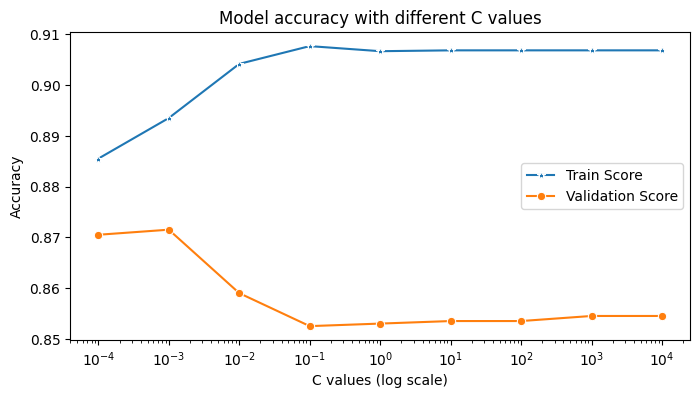

In [ ]:
from sklearn.linear_model import LogisticRegression
# Logistic regression
test_scores = []
train_scores = []
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

for c in c_values:
    model_lr = LogisticRegression(C=c, max_iter=10000).fit(X_train_base, y_train)
    train_scores.append(model_lr.score(X_train_base, y_train))
    test_scores.append(model_lr.score(X_val_base, y_val))

plt.figure(figsize=(8, 4))
sns.lineplot(x=c_values, y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=c_values, y=test_scores, marker='o', label='Validation Score')

plt.xscale("log")
plt.xlabel("C values (log scale)")
plt.ylabel("Accuracy")
plt.title("Model accuracy with different C values")
plt.legend()
plt.show()

In [ ]:
model_lr = LogisticRegression(C=3,max_iter=10000).fit(X_train_base, y_train)
print("Validation set score:{:.4f}".format(model_lr.score(X_val_base, y_val)))

Validation set score:0.8530


In [ ]:
lr = LogisticRegression(C=3,max_iter=10000)
logit_mod = lr.fit(X_train_base, y_train)

conf_mat = confusion_matrix(y_val, lr.predict(X_val_base))
print(conf_mat)
print('Accuracy =', lr.score(X_val_base,y_val))

[[886 157]
 [137 820]]
Accuracy = 0.853


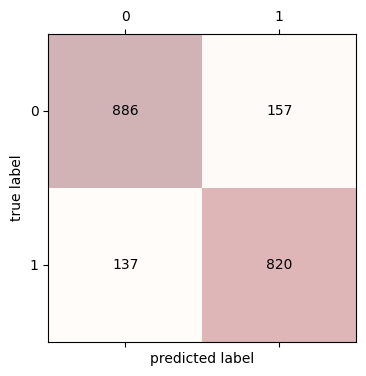

              precision    recall  f1-score   support

           0      0.866     0.849     0.858      1043
           1      0.839     0.857     0.848       957

    accuracy                          0.853      2000
   macro avg      0.853     0.853     0.853      2000
weighted avg      0.853     0.853     0.853      2000



In [ ]:
# Confusion matrix plot y Raschka (2014)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_mat, cmap=plt.cm.Reds, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i,
        s=conf_mat[i, j],
        va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

# Other metrics
print(classification_report(y_val, lr.predict(X_val_base), digits=3))

### 3.1.3 L1 Regularization

In [ ]:
LRPipeline1 = Pipeline([( 'LogReg', LogisticRegression(penalty = 'l1', solver = 'liblinear')) ])
params = { 'LogReg__C': [0.001,0.01,0.1,0.5,0.9,1,3,5,10]}
GSLR1 = GridSearchCV(LRPipeline1, params, cv=10, scoring='accuracy')

In [ ]:
GSLR1.fit(X_train_base,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('LogReg',
                                        LogisticRegression(penalty='l1',
                                                           solver='liblinear'))]),
             param_grid={'LogReg__C': [0.001, 0.01, 0.1, 0.5, 0.9, 1, 3, 5,
                                       10]},
             scoring='accuracy')

In [ ]:
# Fetching the best parameters for Model building
GSLR1.best_params_

{'LogReg__C': 0.9}

In [ ]:
pred = GSLR1.predict(X_val_base)
func_calConfusionMatrix(pred.reshape(-1,1), y_val)

Accuracy is 0.8565
+-----+--------+--------+
|     | yhat=1 | yhat=0 |
+-----+--------+--------+
| y=1 |  823   |  134   |
| y=0 |  153   |  890   |
+-----+--------+--------+
Precision for positive is 0.8432377049180327
Precision for negative is 0.869140625
Recall for positive is 0.8599791013584117
Recall for negative is 0.8533077660594439


[[890 153]
 [134 823]]
Accuracy = 0.8565


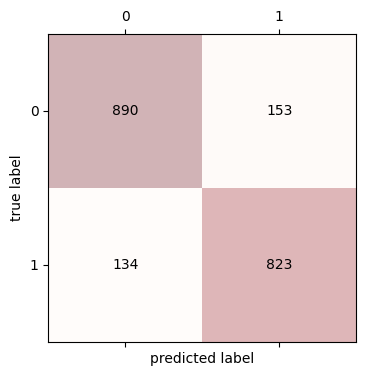

              precision    recall  f1-score   support

           0      0.869     0.853     0.861      1043
           1      0.843     0.860     0.852       957

    accuracy                          0.857      2000
   macro avg      0.856     0.857     0.856      2000
weighted avg      0.857     0.857     0.857      2000



In [ ]:
# Confusion matrix plot y Raschka (2014)
conf_mat = confusion_matrix(y_val, GSLR1.predict(X_val_base))
print(conf_mat)
print('Accuracy =', GSLR1.score(X_val_base,y_val))

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_mat, cmap=plt.cm.Reds, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i,
        s=conf_mat[i, j],
        va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

# Other metrics
print(classification_report(y_val, GSLR1.predict(X_val_base), digits=3))

### 3.1.4 L2 Regularization

In [ ]:
LRPipeline2 = Pipeline([( 'LogReg', LogisticRegression(penalty = 'l2'))])
params = { 'LogReg__C': [0.001,0.01,0.1,0.5,0.9,1,3,5,10]}
GSLR2 = GridSearchCV(LRPipeline2, params, cv=10, scoring='accuracy')
GSLR2.fit(X_train_base,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('LogReg', LogisticRegression())]),
             param_grid={'LogReg__C': [0.001, 0.01, 0.1, 0.5, 0.9, 1, 3, 5,
                                       10]},
             scoring='accuracy')

In [ ]:
# Fetching the best parameters for Model building
GSLR2.best_params_

{'LogReg__C': 0.001}

In [ ]:
pred = GSLR2.predict(X_val_base)
func_calConfusionMatrix(pred.reshape(-1,1), y_val)

Accuracy is 0.8715
+-----+--------+--------+
|     | yhat=1 | yhat=0 |
+-----+--------+--------+
| y=1 |  835   |  122   |
| y=0 |  135   |  908   |
+-----+--------+--------+
Precision for positive is 0.8608247422680413
Precision for negative is 0.8815533980582524
Recall for positive is 0.8725182863113897
Recall for negative is 0.8705656759348035


No Regularizatin AUC: 0.923
L1 AUC: 0.930
L2 AUC: 0.941


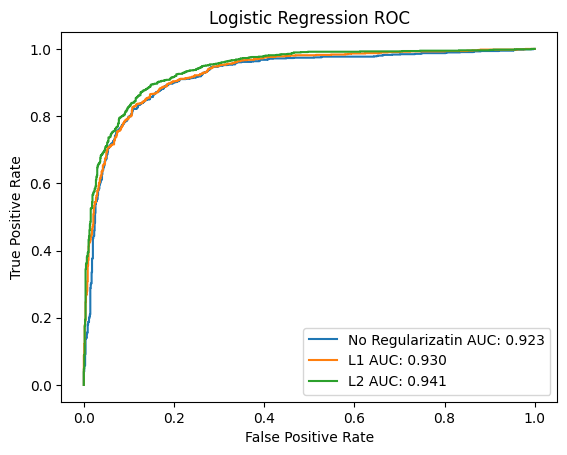

In [ ]:
from sklearn.metrics import roc_curve, auc

def drow_one_roc(prediction, label):
    false_pos_rate, true_pos_rate, _ = roc_curve(y_val, prediction[:, 1], pos_label = 1)
    auc_v = auc(false_pos_rate,true_pos_rate)
    plt.plot(false_pos_rate, true_pos_rate, label = label + " AUC: %.3f" % auc_v)
    print(label + " AUC: %.3f" % auc_v)


def draw_all_roc(models, title):

    for model, label in models:
        drow_one_roc(model.predict_proba(X_val_base), label)

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.title(title)


draw_all_roc( [ (logit_mod, "No Regularizatin"), (GSLR1, 'L1'), (GSLR2, 'L2')], 'Logistic Regression ROC')

In [ ]:
# Learning curve for LR
#plot_learning_curve(GSLR2, X_int_base, y_int, ylim = (0.25, 1.25))

## 3.3 KNN

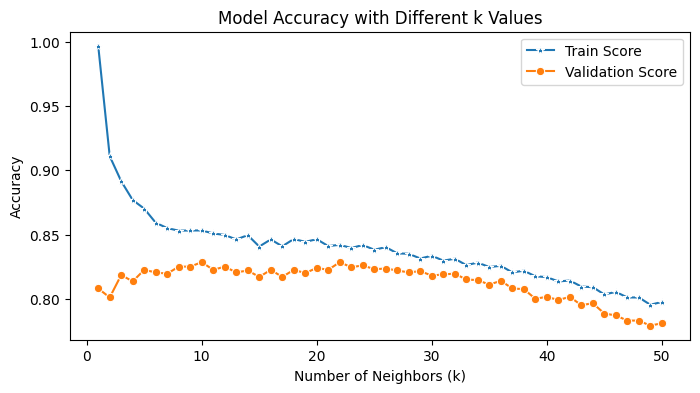

In [ ]:
test_scores = []
train_scores = []

for k in range(1, 51):

    model_knn = KNeighborsClassifier(n_neighbors = k).fit(X_train_base,y_train)
    train_scores.append(model_knn.score(X_train_base,y_train))
    test_scores.append(model_knn.score(X_val_base,y_val))
    #print(model_knn.score(X_valid,y_valid))

plt.figure(figsize=(8, 4))
sns.lineplot(x=range(1, 51), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1, 51), y=test_scores, marker='o', label='Validation Score')

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Model Accuracy with Different k Values")
plt.legend()
plt.show()

In [ ]:
k_ = []
for k in range(1, 51):
    k_.append(k)

In [ ]:
d = {'K': k_, 'accuracy_rate': test_scores}
df = pd.DataFrame(d)
df[df['accuracy_rate']==df['accuracy_rate'].max()]

,K,accuracy_rate
9,10,0.8285
21,22,0.8285


With 'k' set to 9, the KNN model achieved a largest prediction accuracy of 0.829.

In [ ]:
knn_9 = KNeighborsClassifier(n_neighbors = 9)
knn_9.fit(X_train_base, y_train)
accuracy_9 = knn_9.score(X_val_base, y_val)

In [ ]:
pred_knn_y9 = knn_9.predict(X_val_base)
pred_knn_y_9 = pred_knn_y9.reshape(-1, 1)
# Confusion Matrix of KNN(when k = 9)
func_calConfusionMatrix(pred_knn_y_9, y_val)

Accuracy is 0.825
+-----+--------+--------+
|     | yhat=1 | yhat=0 |
+-----+--------+--------+
| y=1 |  824   |  133   |
| y=0 |  217   |  826   |
+-----+--------+--------+
Precision for positive is 0.7915465898174832
Precision for negative is 0.8613138686131386
Recall for positive is 0.8610240334378265
Recall for negative is 0.7919463087248322


[[826 217]
 [133 824]]
Accuracy = 0.825


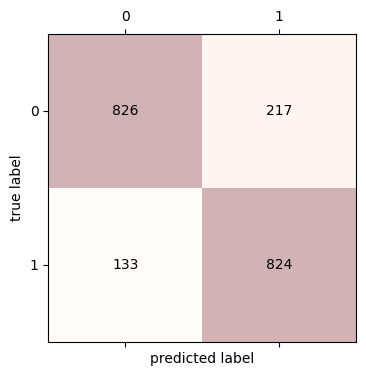

              precision    recall  f1-score   support

           0      0.861     0.792     0.825      1043
           1      0.792     0.861     0.825       957

    accuracy                          0.825      2000
   macro avg      0.826     0.826     0.825      2000
weighted avg      0.828     0.825     0.825      2000



In [ ]:
# Confusion matrix plot y Raschka (2014)
conf_mat = confusion_matrix(y_val, pred_knn_y_9)
print(conf_mat)
print('Accuracy =', knn_9.score(X_val_base,y_val))

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_mat, cmap=plt.cm.Reds, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i,
        s=conf_mat[i, j],
        va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

# Other metrics
print(classification_report(y_val, knn_9.predict(X_val_base), digits=3))

In [ ]:
# Learning Curve of KNN(when k = 7)
plot_learning_curve (knn_7, x_int, y_int, ylim = (0.25, 1.25), cv = 10,
n_jobs = 4)

## 3.4 Random Forest

In [ ]:
# Fitting Random Forest Classification to the Training set
classifier_rf = RandomForestClassifier(n_estimators = 20, max_depth = 10)
classifier_rf.fit(X_train_base , y_train)
#predict the test sets result
y_pred_rf = classifier_rf.predict(X_val_base)
func_calConfusionMatrix(y_pred_rf.reshape(-1,1), y_val)

Accuracy is 0.788
+-----+--------+--------+
|     | yhat=1 | yhat=0 |
+-----+--------+--------+
| y=1 |  730   |  227   |
| y=0 |  197   |  846   |
+-----+--------+--------+
Precision for positive is 0.7874865156418555
Precision for negative is 0.7884436160298229
Recall for positive is 0.7628004179728317
Recall for negative is 0.8111217641418984


In [ ]:
# Grid Search
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state = 2)
parameters_rf = {'criterion': ['gini','entropy'],
                 'min_samples_split': [4,6,8],
                 'n_estimators': [10, 20,50],
                 'max_depth': [5,10,20,50,80,100,200],
                 'max_features': ["sqrt", "log2"]
                 }
clf = GridSearchCV(rfc, parameters_rf, cv = 10, scoring='accuracy')
clf.fit(X_train_base, y_train)
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 200, 'max_features': 'log2', 'min_samples_split': 8, 'n_estimators': 50}


In [ ]:
pred = clf.predict(X_val_base)
func_calConfusionMatrix(pred.reshape(-1,1), y_val)

Accuracy is 0.8735
+-----+--------+--------+
|     | yhat=1 | yhat=0 |
+-----+--------+--------+
| y=1 |  852   |  105   |
| y=0 |  148   |  895   |
+-----+--------+--------+
Precision for positive is 0.852
Precision for negative is 0.895
Recall for positive is 0.890282131661442
Recall for negative is 0.8581016299137104


Untuned AUC: 0.879
Tuned AUC: 0.946


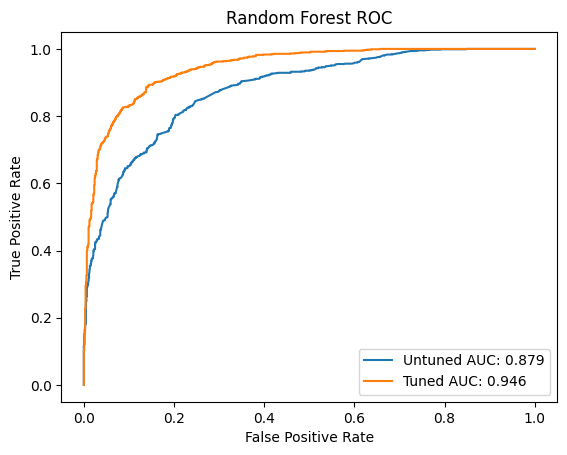

In [ ]:
draw_all_roc( [ (classifier_rf, "Untuned"), (clf, 'Tuned')], 'Random Forest ROC')

## 3.5 SVM

In [ ]:
import sklearn.svm as svm
from sklearn.svm import LinearSVC

In [ ]:
# SVM
kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']
best_c = 0
best_kernel = ''
minierr = 100000
for cv in np.arange(1,21,1):
    for kv in kernel_types:
        model = svm.SVC(kernel=kv, C=cv, max_iter=100000)
        model.fit(X=X_train_base, y=y_train)
        err = 1. - model.score(X_val_base, y_val)
        if err < minierr:
            minierr = err
            best_c = cv
            best_kernel = kv
        print(str(cv)+str(kv))
print('The best c value is {}'.format(best_c))
print('The best kernel is '+ best_kernel)

1linear
1poly
1rbf
1sigmoid
2linear
2poly
2rbf
2sigmoid
3linear
3poly
3rbf
3sigmoid
4linear
4poly
4rbf
4sigmoid
5linear
5poly
5rbf
5sigmoid
6linear
6poly
6rbf
6sigmoid
7linear
7poly
7rbf
7sigmoid
8linear
8poly
8rbf
8sigmoid
9linear
9poly
9rbf
9sigmoid
10linear
10poly
10rbf
10sigmoid
11linear
11poly
11rbf
11sigmoid
12linear
12poly
12rbf
12sigmoid
13linear
13poly
13rbf
13sigmoid
14linear
14poly
14rbf
14sigmoid
15linear
15poly
15rbf
15sigmoid
16linear
16poly
16rbf
16sigmoid
17linear
17poly
17rbf
17sigmoid
18linear
18poly
18rbf
18sigmoid
19linear
19poly
19rbf
19sigmoid
20linear
20poly
20rbf
20sigmoid
The best c value is 5
The best kernel is rbf


In [ ]:
best_kernel = 'sigmoid'
best_c = 1

model_svm = svm.SVC(kernel=best_kernel, C=best_c,max_iter=10000)
model_svm.fit(X=X_train_base, y=y_train)
print("Validation set score:{:.4f}".format(model_svm.score(X_val_base, y_val)))

Validation set score:0.8540


## 3.6 Feed-Forward Neural Network (TensorFlow)

In [ ]:
# Basic Model
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow.keras.callbacks import LambdaCallback

log_callback = LambdaCallback(
    on_epoch_end=lambda epoch, logs: print(f"Epoch {epoch+1}: loss={logs['loss']:.4f}, accuracy={logs['accuracy']:.4f}")
    if (epoch + 1) % 10 == 0 else None
)

fnn = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(734,)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(180, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

fnn.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.5, name='accuracy')])


fnn.fit(X_train_base, y_train, batch_size=32, epochs=100, verbose=0, callbacks=[log_callback])

pred_fnn_basic = fnn.predict(X_val_base)
y_pred_fnn_basic = pred_fnn_basic.round()

print('begin evaluation')
test_loss, test_acc = fnn.evaluate(X_val_base, y_val, verbose=1)

Epoch 10: loss=0.1779, accuracy=0.9277
Epoch 20: loss=0.1322, accuracy=0.9457
Epoch 30: loss=0.1042, accuracy=0.9548
Epoch 40: loss=0.0894, accuracy=0.9628
Epoch 50: loss=0.0738, accuracy=0.9678
Epoch 60: loss=0.0611, accuracy=0.9745
Epoch 70: loss=0.0531, accuracy=0.9768
Epoch 80: loss=0.0472, accuracy=0.9798
Epoch 90: loss=0.0432, accuracy=0.9805
Epoch 100: loss=0.0382, accuracy=0.9838
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
begin evaluation
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8288 - loss: 1.5599


In [ ]:
# Confusion Matrix of FNN
func_calConfusionMatrix(y_pred_fnn_basic,y_val)

Accuracy is 0.829
+-----+--------+--------+
|     | yhat=1 | yhat=0 |
+-----+--------+--------+
| y=1 |  811   |  146   |
| y=0 |  196   |  847   |
+-----+--------+--------+
Precision for positive is 0.8053624627606752
Precision for negative is 0.8529707955689829
Recall for positive is 0.8474399164054337
Recall for negative is 0.8120805369127517


Epoch 10: loss=0.0399, accuracy=0.9828
Epoch 20: loss=0.0322, accuracy=0.9865
Epoch 30: loss=0.0342, accuracy=0.9850
Epoch 40: loss=0.0291, accuracy=0.9875
Epoch 50: loss=0.0271, accuracy=0.9878
Epoch 60: loss=0.0270, accuracy=0.9883
Epoch 70: loss=0.0326, accuracy=0.9853
Epoch 80: loss=0.0219, accuracy=0.9900
Epoch 90: loss=0.0237, accuracy=0.9890
Epoch 100: loss=0.0216, accuracy=0.9900


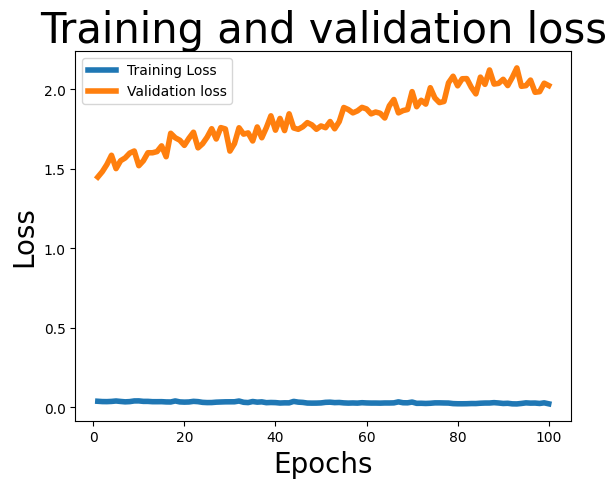

In [ ]:
# Basic model Training History

history = fnn.fit(X_train_base,
                  y_train,
                  validation_data = (X_val_base,y_val),
                  batch_size=32,
                  epochs=100,
                  verbose=0,
                  callbacks=[log_callback])

history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc)+1)


plt.plot(epochs, loss,label = 'Training Loss',linewidth=4)
plt.plot(epochs, val_loss, label = 'Validation loss',linewidth=4)
plt.title('Training and validation loss',fontsize=30)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.legend()
plt.rcParams["figure.figsize"] = (12,8)

plt.show()

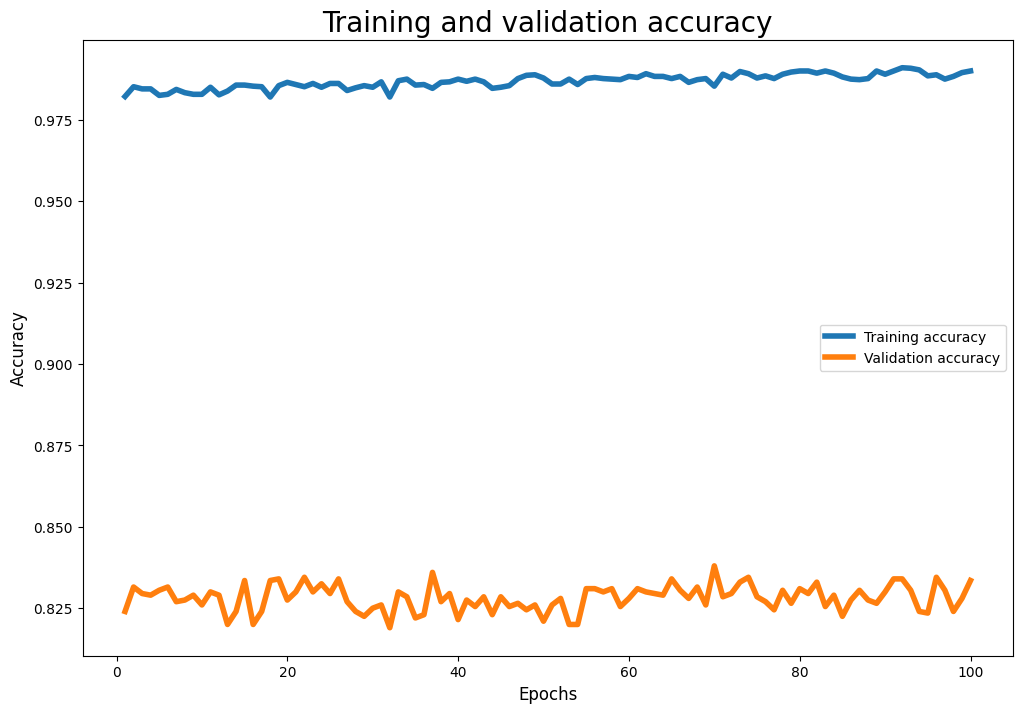

In [ ]:
# Basic model accuracy history
plt.plot(epochs, acc, label = 'Training accuracy',linewidth=4)
plt.plot(epochs, val_acc, label = 'Validation accuracy',linewidth=4)
plt.title('Training and validation accuracy',fontsize=20)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.rcParams["figure.figsize"] = (8,6)
plt.legend()

plt.show()

## 3.7 Conclusion of base model

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,  accuracy_score, f1_score
# Evaluation
# predict results
y_pred_base_lr = GSLR2.predict(X_val_base)
y_pred_base_knn = knn_9.predict(X_val_base)
y_pred_base_rf = clf.predict(X_val_base)
y_pred_base_svm = model_svm.predict(X_val_base)
y_pred_base_fnn = fnn.predict(X_val_base).round()

# Logistic Regression
print(classification_report(y_val,y_pred_base_lr))

# KNN
print(classification_report(y_val,y_pred_base_knn))

# Random Forest
print(classification_report(y_val,y_pred_base_rf))

# SVM
print(classification_report(y_val,y_pred_base_svm))

# FNN
print(classification_report(y_val,y_pred_base_fnn))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1043
           1       0.86      0.87      0.87       957

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000

              precision    recall  f1-score   support

           0       0.86      0.79      0.83      1043
           1       0.79      0.86      0.82       957

    accuracy                           0.82      2000
   macro avg       0.83      0.83      0.82      2000
weighted avg       0.83      0.82      0.83      2000

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1043
           1       0.85      0.89      0.87       957

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87  

# 4. Model - With timestamp and ad topic line & New data encoding

To handle categorical variables (City, Country, Gender) and the text variable (Ad_Topic_Line) without using one-hot encoding, we plan to apply these alternative approaches:
- For Categorical Variables (City, Country, Gender): Since City and Country have high cardinality one-hot encoding is inefficient. We can apply Normalized Frequency Encoding. It replaces each category with its frequency in the dataset, so it captures the importance of frequently occurring categories.
- For Text Variables (Ad_Topic_Line): We will try TF-IDF Encoding and Word2Vec Embeddings.
  
  * TF-IDF Encoding is efficient and simple, which is good for
classic machine learning models. It converts text into weighted numerical representations.
  * Word2Vec Embeddings works better for deep learning models. The function maps words to dense vector representations.

## 4.1 Data Processing

### 4.1.1 Categorical Variables

In [ ]:
data.reset_index(drop=True, inplace=True)
df_cate = data[['City', 'Country', 'Gender']].copy()
df_cate

,City,Country,Gender
0,Lisafort,Svalbard & Jan Mayen Islands,Male
1,West Angelabury,Singapore,Male
2,Reyesfurt,Guadeloupe,Female
3,New Michael,Zambia,Female
4,West Richard,Qatar,Female
...,...,...,...
9995,West Angelabury,Singapore,Male
9996,Kennedyfurt,Luxembourg,Male
9997,North Randy,Egypt,Female
9998,North Samantha,Malawi,Female


In [ ]:
# Apply Normalized Frequency Encoding to 'City' and 'Country'
for col in ['City', 'Country']:
    freq_counts = df_cate[col].value_counts(normalize=True)  # Compute relative frequency
    df_cate[col] = df_cate[col].map(freq_counts)  # Replace categories with their normalized frequency

In [ ]:
# Apply Dummy Encoding to 'Gender' (Male -> 1, Female -> 0)
df_cate['Gender'] = df_cate['Gender'].map({'Male': 1, 'Female': 0})

In [ ]:
# Rename
df_cate.rename(columns={
    'City': 'City_Freq',
    'Country': 'Country_Freq',
    'Gender': 'Gender_Enc'
}, inplace=True)

In [ ]:
# Display the new categorical data
df_cate.head()

,City_Freq,Country_Freq,Gender_Enc
0,0.0261,0.0006,1
1,0.0109,0.0130,1
2,0.0205,0.0009,0
3,0.0110,0.0039,0
4,0.0016,0.0224,0


In [ ]:
# count number of city and country
city_counts = data['City'].value_counts()
country_counts = data['Country'].value_counts()
print(city_counts)

City
Hubbardmouth       336
West Brandonton    275
Lisafort           261
Wintersfort        230
Stewartbury        207
                  ... 
Lake Allenville      1
Hughesport           1
North Frankstad      1
Cunninghamhaven      1
Davidview            1
Name: count, Length: 521, dtype: int64


In [ ]:
print(country_counts)

Country
Australia           388
Czech Republic      330
Turkey              312
Qatar               224
Hong Kong           221
                   ... 
Paraguay              1
Mozambique            1
Saint Barthelemy      1
Suriname              1
Haiti                 1
Name: count, Length: 207, dtype: int64


In [ ]:
data = data.reset_index(drop=True)

In [ ]:
df_cate = data[['City', 'Country', 'Gender']].copy()

In [ ]:
threshold = 90

for col in ['City', 'Country']:
    counts = df_cate[col].value_counts()
    common_vals = counts[counts >= threshold].index
    df_cate[col] = df_cate[col].apply(lambda x: x if x in common_vals else 'Other')

In [ ]:
df_onehot = pd.get_dummies(df_cate[['City', 'Country']], prefix=['City', 'Country'])
df_cate['Gender_Enc'] = df_cate['Gender'].map({'Male': 1, 'Female': 0})
df_cate = pd.concat([df_onehot, df_cate[['Gender_Enc']]], axis=1)

In [ ]:
df_cate

,City_Burgessside,City_East Carlos,City_East Kevinbury,City_Garciatown,City_Hubbardmouth,City_Kingshire,City_Kristinfurt,City_Lake Jennifer,City_Lisafort,City_New Brandy,...,Country_Qatar,Country_Senegal,Country_Singapore,Country_Switzerland,Country_Turkey,Country_Uganda,Country_Ukraine,Country_Vanuatu,Country_Western Sahara,Gender_Enc
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,1
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,1
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,1
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0


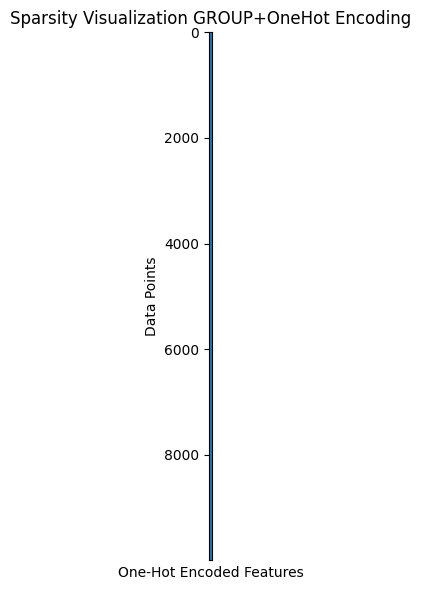

In [ ]:
plt.figure(figsize=(12, 6))
plt.spy(df_onehot, markersize=1)
plt.title("Sparsity Visualization GROUP+OneHot Encoding")
plt.xlabel("One-Hot Encoded Features")
plt.ylabel("Data Points")
plt.xticks([])
plt.tight_layout()
plt.show()

### 4.1.2 Time Variables

In [ ]:
data.reset_index(drop=True, inplace=True)
df_time = data[['Timestamp']].copy()
df_time['Timestamp'] = pd.to_datetime(df_time['Timestamp'], errors='coerce')
# Extract new time-based features
df_time['Day_of_Month'] = df_time['Timestamp'].dt.day
df_time['Hour_of_Day']  = df_time['Timestamp'].dt.hour
df_time['Weekend']      = df_time['Timestamp'].dt.dayofweek.isin([5, 6]).astype(int)

df_time.drop(columns='Timestamp', inplace=True)

In [ ]:
# Display the new DataFrame
print(df_time.head())

   Day_of_Month  Hour_of_Day  Weekend
0             9           21        0
1            16           17        1
2            29           10        0
3            21           14        0
4            21           10        0


### 4.1.3 Text Variables

In [ ]:
# Apply TF-IDF Encoding
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

data.reset_index(drop=True, inplace=True)
df_text = data[['Ad_Topic_Line']].copy()

tfidf = TfidfVectorizer(max_features=50)
tfidf_matrix = tfidf.fit_transform(df_text['Ad_Topic_Line'])

# Convert TF-IDF results into a DataFrame
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Add original Ad Topic Line for reference
df_tfidf.insert(0, 'Ad_Topic_Line', df_text['Ad_Topic_Line'])

# Display output
print(df_tfidf.head())

                         Ad_Topic_Line  analyzer  attitude  based  business  \
0      Decentralized real-time circuit       0.0       0.0    0.0       0.0   
1       Optional full-range projection       0.0       0.0    0.0       0.0   
2  Total 5thgeneration standardization       0.0       0.0    0.0       0.0   
3          Balanced empowering success       0.0       0.0    0.0       0.0   
4  Total 5thgeneration standardization       0.0       0.0    0.0       0.0   

   client  cloned  coherent  configurable  content  ...  synchronized  total  \
0     0.0     0.0       0.0           0.0      0.0  ...           0.0    0.0   
1     0.0     0.0       0.0           0.0      0.0  ...           0.0    0.0   
2     0.0     0.0       0.0           0.0      0.0  ...           0.0    1.0   
3     0.0     0.0       0.0           0.0      0.0  ...           0.0    0.0   
4     0.0     0.0       0.0           0.0      0.0  ...           0.0    1.0   

   transitional  trending  uniform   up  upw

Most TF-IDF values are 0, meaning many features contribute little information. So, we can use PCA method to reduce the dimensionality further and to retain the most important information.

In [ ]:
pca = PCA(n_components=10)  # Reduce to 10 dimensions
tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())

df_pca = pd.DataFrame(tfidf_pca, columns=[f'PCA_{i}' for i in range(10)])
df_pca.insert(0, 'Ad_Topic_Line', df_text['Ad_Topic_Line'])

# Display output
print(df_pca.head)

<bound method NDFrame.head of                                Ad_Topic_Line     PCA_0     PCA_1     PCA_2  \
0            Decentralized real-time circuit -0.010114 -0.021786  0.006056   
1             Optional full-range projection -0.010672 -0.143041  0.249203   
2        Total 5thgeneration standardization -0.021467 -0.058724  0.027405   
3                Balanced empowering success -0.010114 -0.021786  0.006056   
4        Total 5thgeneration standardization -0.021467 -0.058724  0.027405   
...                                      ...       ...       ...       ...   
9995          Profound executive flexibility -0.010114 -0.021786  0.006056   
9996          Managed zero tolerance concept -0.012614 -0.047876 -0.004646   
9997          Intuitive exuding service-desk -0.028241 -0.056386  0.023580   
9998        Realigned content-based leverage -0.251662  0.150979 -0.030156   
9999  Optimized upward-trending productivity  0.153882  0.084709 -0.000428   

         PCA_3     PCA_4     PCA_

Each PCA component (PCA_0, PCA_1, etc.) is a new feature that represents the text in a compressed way. PCA_0 captures the most variance, PCA_1 captures the second most, and so on. These features can now be used in machine learning models instead of raw TF-IDF data.

## 4.2 Combine the new encoding variables

In [ ]:
# Ensure all DataFrames have the same index
data = data.reset_index(drop=True)
df_cate = df_cate.reset_index(drop=True)
df_time = df_time.reset_index(drop=True)
df_tfidf.reset_index(drop=True, inplace=True)
df_pca = df_pca.reset_index(drop=True)
df_tfidf.reset_index(drop=True, inplace=True)

df_merged = pd.concat([data,df_cate,df_time, df_pca], axis=1)

In [ ]:
df_merged.columns

Index(['DailyTime_Spent_on_Site', 'Age', 'Area_Income', 'Daily_Internet_Usage',
       'Ad_Topic_Line', 'City', 'Gender', 'Country', 'Timestamp', 'click',
       'City_Burgessside', 'City_East Carlos', 'City_East Kevinbury',
       'City_Garciatown', 'City_Hubbardmouth', 'City_Kingshire',
       'City_Kristinfurt', 'City_Lake Jennifer', 'City_Lisafort',
       'City_New Brandy', 'City_New Michael', 'City_New Tinamouth',
       'City_New Travistown', 'City_North Randy', 'City_Other',
       'City_Port Jeffrey', 'City_Reyesfurt', 'City_Shelbyport',
       'City_Stewartbury', 'City_West Angelabury', 'City_West Brandonton',
       'City_West Lisa', 'City_Westshire', 'City_Williamsport',
       'City_Wintersfort', 'City_Wrightburgh', 'City_Youngfort',
       'Country_Albania', 'Country_Algeria', 'Country_American Samoa',
       'Country_Australia', 'Country_Bangladesh', 'Country_Belgium',
       'Country_Bolivia', 'Country_Bosnia and Herzegovina', 'Country_Burundi',
       'Country_Cameroon

In [ ]:
# Drop redundant or original columns that have been replaced
df_final = df_merged.drop(columns=['City', 'Country', 'Gender', 'Timestamp'], errors='ignore')

In [ ]:
# Display merged dataset
print(df_final.head())

   DailyTime_Spent_on_Site   Age  Area_Income  Daily_Internet_Usage  \
0                    62.26  32.0     69481.85                172.83   
1                    41.73  31.0     61840.26                207.17   
2                    44.40  30.0     57877.15                172.83   
3                    59.88  28.0     56180.93                207.17   
4                    49.21  30.0     54324.73                201.58   

                         Ad_Topic_Line  click  City_Burgessside  \
0      Decentralized real-time circuit      0             False   
1       Optional full-range projection      0             False   
2  Total 5thgeneration standardization      0             False   
3          Balanced empowering success      0             False   
4  Total 5thgeneration standardization      1             False   

   City_East Carlos  City_East Kevinbury  City_Garciatown  ...     PCA_0  \
0             False                False            False  ... -0.010114   
1             Fals

In [ ]:
y_final = df_final['click']
X_final = df_final.copy()
X_final = df_final.drop(['click'], axis=1)

In [ ]:
# Split training data and testing data
X_final_int, X_final_test, y_final_int, y_final_test = train_test_split(X_final, y_final, test_size=0.2, random_state=1)
X_final_train, X_final_val, y_final_train, y_final_val = train_test_split(X_final_int, y_final_int, test_size=0.25, random_state=1)
# print proportions
print('train: {}% | Validation: {}% | Test: {}%'.format( round(len(y_final_train)/len(y_final),2),
                                                        round(len(y_final_val)/len(y_final) ,2),
                                                        round(len(y_final_test)/len(y_final),2) ) )

train: 0.6% | Validation: 0.2% | Test: 0.2%


In [ ]:
X_final_int.columns

Index(['DailyTime_Spent_on_Site', 'Age', 'Area_Income', 'Daily_Internet_Usage',
       'Ad_Topic_Line', 'City_Burgessside', 'City_East Carlos',
       'City_East Kevinbury', 'City_Garciatown', 'City_Hubbardmouth',
       'City_Kingshire', 'City_Kristinfurt', 'City_Lake Jennifer',
       'City_Lisafort', 'City_New Brandy', 'City_New Michael',
       'City_New Tinamouth', 'City_New Travistown', 'City_North Randy',
       'City_Other', 'City_Port Jeffrey', 'City_Reyesfurt', 'City_Shelbyport',
       'City_Stewartbury', 'City_West Angelabury', 'City_West Brandonton',
       'City_West Lisa', 'City_Westshire', 'City_Williamsport',
       'City_Wintersfort', 'City_Wrightburgh', 'City_Youngfort',
       'Country_Albania', 'Country_Algeria', 'Country_American Samoa',
       'Country_Australia', 'Country_Bangladesh', 'Country_Belgium',
       'Country_Bolivia', 'Country_Bosnia and Herzegovina', 'Country_Burundi',
       'Country_Cameroon', 'Country_Croatia', 'Country_Czech Republic',
       'Co

In [ ]:
X_final_int

,DailyTime_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic_Line,City_Burgessside,City_East Carlos,City_East Kevinbury,City_Garciatown,City_Hubbardmouth,...,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9
2694,70.58,37.0,68448.94,173.43,Digitized radical architecture,False,False,False,False,False,...,-0.010114,-0.021786,0.006056,-0.026182,-0.023866,-0.007000,-0.019752,-0.026780,-0.010319,-0.010943
5140,69.62,34.0,34191.23,203.84,Cloned explicit middleware,False,False,False,False,False,...,-0.043949,-0.553624,-0.606405,0.505917,-0.058572,-0.017597,0.047476,0.020857,0.047348,0.016607
2568,68.01,53.0,40182.84,176.98,Seamless optimal contingency,False,False,False,False,False,...,-0.010114,-0.021786,0.006056,-0.026182,-0.023866,-0.007000,-0.019752,-0.026780,-0.010319,-0.010943
3671,48.03,45.0,31092.93,150.80,Reactive demand-driven strategy,False,False,False,False,False,...,-0.010114,-0.021786,0.006056,-0.026182,-0.023866,-0.007000,-0.019752,-0.026780,-0.010319,-0.010943
7427,77.14,33.0,61005.87,204.02,Front-line heuristic data-warehouse,False,False,False,False,False,...,-0.333868,0.238778,-0.014675,0.137996,0.138583,-0.285110,0.022012,-0.028241,-0.006230,-0.030672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,43.84,36.0,48335.20,124.44,Networked impactful framework,False,False,False,False,False,...,-0.010114,-0.021786,0.006056,-0.026182,-0.023866,-0.007000,-0.019752,-0.026780,-0.010319,-0.010943
7813,51.24,36.0,76003.47,124.44,Decentralized attitude-oriented interface,False,False,False,False,False,...,0.114353,-0.086409,-0.159107,-0.357607,0.474607,0.088285,0.031388,0.154357,-0.084759,0.311232
905,80.99,26.0,51463.17,131.68,Focused multi-state workforce,False,False,False,False,False,...,0.292284,-0.058770,0.513436,0.414197,0.141864,0.049841,0.158798,0.091707,0.085601,0.037455
5192,82.07,22.0,63363.04,180.47,Monitored systematic hierarchy,False,False,False,False,False,...,-0.058871,-0.002787,-0.003105,-0.053143,0.007735,-0.044936,-0.044253,-0.035556,-0.060729,0.016758


In [ ]:
############### ad topic line and gender and city and country and weekend and day and hour = 0.83 best!!!!
X_final_int_base = X_final_int.drop([
       'Ad_Topic_Line'], axis=1)
X_final_train_base = X_final_train.drop([
       'Ad_Topic_Line'], axis=1)
X_final_test_base = X_final_test.drop([
       'Ad_Topic_Line'], axis=1)
X_final_val_base = X_final_val.drop([
       'Ad_Topic_Line'], axis=1)

## only City_Freq = 0.712

## only Country_Freq = 0.715

## City_Freq and Country_Freq = 0.814
# X_final_int_base = X_final_int.drop([
#        'Ad_Topic_Line','Gender_Enc',
#        'Day_of_Month', 'Hour_of_Day', 'Weekend', 'Ad_Topic_Line', 'PCA_0',
#        'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
#        'PCA_9'], axis=1)
# X_final_train_base = X_final_train.drop([
#        'Ad_Topic_Line','Gender_Enc',
#        'Day_of_Month', 'Hour_of_Day', 'Weekend', 'Ad_Topic_Line', 'PCA_0',
#        'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
#        'PCA_9'], axis=1)
# X_final_test_base = X_final_test.drop([
#        'Ad_Topic_Line','Gender_Enc',
#        'Day_of_Month', 'Hour_of_Day', 'Weekend', 'Ad_Topic_Line', 'PCA_0',
#        'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
#        'PCA_9'], axis=1)
# X_final_val_base = X_final_val.drop([
#        'Ad_Topic_Line','Gender_Enc',
#        'Day_of_Month', 'Hour_of_Day', 'Weekend', 'Ad_Topic_Line', 'PCA_0',
#        'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
#        'PCA_9'], axis=1)

## City_Freq and Country_Freq and Gender = 0.816
# X_final_int_base = X_final_int.drop([
#        'Ad_Topic_Line',
#        'Day_of_Month', 'Hour_of_Day', 'Weekend', 'Ad_Topic_Line', 'PCA_0',
#        'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
#        'PCA_9'], axis=1)
# X_final_train_base = X_final_train.drop([
#        'Ad_Topic_Line',
#        'Day_of_Month', 'Hour_of_Day', 'Weekend', 'Ad_Topic_Line', 'PCA_0',
#        'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
#        'PCA_9'], axis=1)
# X_final_test_base = X_final_test.drop([
#        'Ad_Topic_Line',
#        'Day_of_Month', 'Hour_of_Day', 'Weekend', 'Ad_Topic_Line', 'PCA_0',
#        'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
#        'PCA_9'], axis=1)
# X_final_val_base = X_final_val.drop([
#        'Ad_Topic_Line',
#        'Day_of_Month', 'Hour_of_Day', 'Weekend', 'Ad_Topic_Line', 'PCA_0',
#        'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
#        'PCA_9'], axis=1)

## only Gender = 0.724 a good pattern
# X_final_int_base = X_final_int.drop(['Ad_Topic_Line','City_Freq','Country_Freq',
#        'Day_of_Month', 'Hour_of_Day', 'Weekend', 'Ad_Topic_Line', 'PCA_0',
#        'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
#        'PCA_9'], axis=1)
# X_final_train_base = X_final_train.drop(['Ad_Topic_Line','City_Freq','Country_Freq',
#        'Day_of_Month', 'Hour_of_Day', 'Weekend', 'Ad_Topic_Line', 'PCA_0',
#        'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
#        'PCA_9'], axis=1)
# X_final_test_base = X_final_test.drop(['Ad_Topic_Line','City_Freq','Country_Freq',
#        'Day_of_Month', 'Hour_of_Day', 'Weekend', 'Ad_Topic_Line', 'PCA_0',
#        'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
#        'PCA_9'], axis=1)
# X_final_val_base = X_final_val.drop(['Ad_Topic_Line','City_Freq','Country_Freq',
#        'Day_of_Month', 'Hour_of_Day', 'Weekend', 'Ad_Topic_Line', 'PCA_0',
#        'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
#        'PCA_9'], axis=1)

# only Weekend = 0.7265
# X_final_int_base = X_final_int.drop(['Ad_Topic_Line', 'City_Burgessside', 'City_East Carlos',
#        'City_East Kevinbury', 'City_Garciatown', 'City_Hubbardmouth',
#        'City_Kingshire', 'City_Kristinfurt', 'City_Lake Jennifer',
#        'City_Lisafort', 'City_New Brandy', 'City_New Michael',
#        'City_New Tinamouth', 'City_New Travistown', 'City_North Randy',
#        'City_Other', 'City_Port Jeffrey', 'City_Reyesfurt', 'City_Shelbyport',
#        'City_Stewartbury', 'City_West Angelabury', 'City_West Brandonton',
#        'City_West Lisa', 'City_Westshire', 'City_Williamsport',
#        'City_Wintersfort', 'City_Wrightburgh', 'City_Youngfort',
#        'Country_Albania', 'Country_Algeria', 'Country_American Samoa',
#        'Country_Australia', 'Country_Bangladesh', 'Country_Belgium',
#        'Country_Bolivia', 'Country_Bosnia and Herzegovina', 'Country_Burundi',
#        'Country_Cameroon', 'Country_Croatia', 'Country_Czech Republic',
#        'Country_El Salvador', 'Country_Gabon', 'Country_Guinea',
#        'Country_Hong Kong', 'Country_Liechtenstein', 'Country_Luxembourg',
#        'Country_Micronesia', 'Country_Moldova', 'Country_Myanmar',
#        'Country_Namibia', 'Country_Netherlands', 'Country_Niger',
#        'Country_Northern Mariana Islands', 'Country_Other', 'Country_Qatar',
#        'Country_Senegal', 'Country_Singapore', 'Country_Switzerland',
#        'Country_Turkey', 'Country_Uganda', 'Country_Ukraine',
#        'Country_Vanuatu', 'Country_Western Sahara', 'Gender_Enc',
#        'Ad_Topic_Line', 'PCA_0',
#        'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
#        'PCA_9'], axis=1)
# X_final_train_base = X_final_train.drop(['Ad_Topic_Line', 'City_Burgessside', 'City_East Carlos',
#        'City_East Kevinbury', 'City_Garciatown', 'City_Hubbardmouth',
#        'City_Kingshire', 'City_Kristinfurt', 'City_Lake Jennifer',
#        'City_Lisafort', 'City_New Brandy', 'City_New Michael',
#        'City_New Tinamouth', 'City_New Travistown', 'City_North Randy',
#        'City_Other', 'City_Port Jeffrey', 'City_Reyesfurt', 'City_Shelbyport',
#        'City_Stewartbury', 'City_West Angelabury', 'City_West Brandonton',
#        'City_West Lisa', 'City_Westshire', 'City_Williamsport',
#        'City_Wintersfort', 'City_Wrightburgh', 'City_Youngfort',
#        'Country_Albania', 'Country_Algeria', 'Country_American Samoa',
#        'Country_Australia', 'Country_Bangladesh', 'Country_Belgium',
#        'Country_Bolivia', 'Country_Bosnia and Herzegovina', 'Country_Burundi',
#        'Country_Cameroon', 'Country_Croatia', 'Country_Czech Republic',
#        'Country_El Salvador', 'Country_Gabon', 'Country_Guinea',
#        'Country_Hong Kong', 'Country_Liechtenstein', 'Country_Luxembourg',
#        'Country_Micronesia', 'Country_Moldova', 'Country_Myanmar',
#        'Country_Namibia', 'Country_Netherlands', 'Country_Niger',
#        'Country_Northern Mariana Islands', 'Country_Other', 'Country_Qatar',
#        'Country_Senegal', 'Country_Singapore', 'Country_Switzerland',
#        'Country_Turkey', 'Country_Uganda', 'Country_Ukraine',
#        'Country_Vanuatu', 'Country_Western Sahara', 'Gender_Enc',
#        'Ad_Topic_Line', 'PCA_0',
#        'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
#        'PCA_9'], axis=1)
# X_final_test_base = X_final_test.drop(['Ad_Topic_Line', 'City_Burgessside', 'City_East Carlos',
#        'City_East Kevinbury', 'City_Garciatown', 'City_Hubbardmouth',
#        'City_Kingshire', 'City_Kristinfurt', 'City_Lake Jennifer',
#        'City_Lisafort', 'City_New Brandy', 'City_New Michael',
#        'City_New Tinamouth', 'City_New Travistown', 'City_North Randy',
#        'City_Other', 'City_Port Jeffrey', 'City_Reyesfurt', 'City_Shelbyport',
#        'City_Stewartbury', 'City_West Angelabury', 'City_West Brandonton',
#        'City_West Lisa', 'City_Westshire', 'City_Williamsport',
#        'City_Wintersfort', 'City_Wrightburgh', 'City_Youngfort',
#        'Country_Albania', 'Country_Algeria', 'Country_American Samoa',
#        'Country_Australia', 'Country_Bangladesh', 'Country_Belgium',
#        'Country_Bolivia', 'Country_Bosnia and Herzegovina', 'Country_Burundi',
#        'Country_Cameroon', 'Country_Croatia', 'Country_Czech Republic',
#        'Country_El Salvador', 'Country_Gabon', 'Country_Guinea',
#        'Country_Hong Kong', 'Country_Liechtenstein', 'Country_Luxembourg',
#        'Country_Micronesia', 'Country_Moldova', 'Country_Myanmar',
#        'Country_Namibia', 'Country_Netherlands', 'Country_Niger',
#        'Country_Northern Mariana Islands', 'Country_Other', 'Country_Qatar',
#        'Country_Senegal', 'Country_Singapore', 'Country_Switzerland',
#        'Country_Turkey', 'Country_Uganda', 'Country_Ukraine',
#        'Country_Vanuatu', 'Country_Western Sahara', 'Gender_Enc',
#        'Ad_Topic_Line', 'PCA_0',
#        'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
#        'PCA_9'], axis=1)
# X_final_val_base = X_final_val.drop(['Ad_Topic_Line', 'City_Burgessside', 'City_East Carlos',
#        'City_East Kevinbury', 'City_Garciatown', 'City_Hubbardmouth',
#        'City_Kingshire', 'City_Kristinfurt', 'City_Lake Jennifer',
#        'City_Lisafort', 'City_New Brandy', 'City_New Michael',
#        'City_New Tinamouth', 'City_New Travistown', 'City_North Randy',
#        'City_Other', 'City_Port Jeffrey', 'City_Reyesfurt', 'City_Shelbyport',
#        'City_Stewartbury', 'City_West Angelabury', 'City_West Brandonton',
#        'City_West Lisa', 'City_Westshire', 'City_Williamsport',
#        'City_Wintersfort', 'City_Wrightburgh', 'City_Youngfort',
#        'Country_Albania', 'Country_Algeria', 'Country_American Samoa',
#        'Country_Australia', 'Country_Bangladesh', 'Country_Belgium',
#        'Country_Bolivia', 'Country_Bosnia and Herzegovina', 'Country_Burundi',
#        'Country_Cameroon', 'Country_Croatia', 'Country_Czech Republic',
#        'Country_El Salvador', 'Country_Gabon', 'Country_Guinea',
#        'Country_Hong Kong', 'Country_Liechtenstein', 'Country_Luxembourg',
#        'Country_Micronesia', 'Country_Moldova', 'Country_Myanmar',
#        'Country_Namibia', 'Country_Netherlands', 'Country_Niger',
#        'Country_Northern Mariana Islands', 'Country_Other', 'Country_Qatar',
#        'Country_Senegal', 'Country_Singapore', 'Country_Switzerland',
#        'Country_Turkey', 'Country_Uganda', 'Country_Ukraine',
#        'Country_Vanuatu', 'Country_Western Sahara', 'Gender_Enc',
#        'Ad_Topic_Line', 'PCA_0',
#        'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
#        'PCA_9'], axis=1)

## only ad topic line = 0.726, a good pattern
# X_final_int_base = X_final_int.drop(['Ad_Topic_Line','City_Freq','Country_Freq', 'Gender_Enc',
#        'Day_of_Month', 'Hour_of_Day', 'Weekend'], axis=1)
# X_final_train_base = X_final_train.drop(['Ad_Topic_Line','City_Freq','Country_Freq', 'Gender_Enc',
#        'Day_of_Month', 'Hour_of_Day', 'Weekend'], axis=1)
# X_final_test_base = X_final_test.drop(['Ad_Topic_Line','City_Freq','Country_Freq', 'Gender_Enc',
#        'Day_of_Month', 'Hour_of_Day', 'Weekend'], axis=1)
# X_final_val_base = X_final_val.drop(['Ad_Topic_Line','City_Freq','Country_Freq', 'Gender_Enc',
#        'Day_of_Month', 'Hour_of_Day', 'Weekend'], axis=1)

## ad topic line and gender = 0.732  good pattern
# X_final_int_base = X_final_int.drop(['Ad_Topic_Line','City_Freq','Country_Freq',
#        'Day_of_Month', 'Hour_of_Day', 'Weekend'], axis=1)
# X_final_train_base = X_final_train.drop(['Ad_Topic_Line','City_Freq','Country_Freq',
#        'Day_of_Month', 'Hour_of_Day', 'Weekend'], axis=1)
# X_final_test_base = X_final_test.drop(['Ad_Topic_Line','City_Freq','Country_Freq',
#        'Day_of_Month', 'Hour_of_Day', 'Weekend'], axis=1)
# X_final_val_base = X_final_val.drop(['Ad_Topic_Line','City_Freq','Country_Freq',
#        'Day_of_Month', 'Hour_of_Day', 'Weekend'], axis=1)

#################### ad topic line and gender and city and country = 0.83  good pattern!!!
# X_final_int_base = X_final_int.drop([
#        'Ad_Topic_Line',
#        'Day_of_Month', 'Hour_of_Day', 'Weekend'], axis=1)
# X_final_train_base = X_final_train.drop([
#        'Ad_Topic_Line',
#        'Day_of_Month', 'Hour_of_Day', 'Weekend'], axis=1)
# X_final_test_base = X_final_test.drop([
#        'Ad_Topic_Line',
#        'Day_of_Month', 'Hour_of_Day', 'Weekend'], axis=1)
# X_final_val_base = X_final_val.drop([
#        'Ad_Topic_Line',
#        'Day_of_Month', 'Hour_of_Day', 'Weekend'], axis=1)


### ad topic line and gender and city and country and weekend = 0.83
# X_final_int_base = X_final_int.drop([
#        'Ad_Topic_Line',
#        'Day_of_Month', 'Hour_of_Day'], axis=1)
# X_final_train_base = X_final_train.drop([
#        'Ad_Topic_Line',
#        'Day_of_Month', 'Hour_of_Day'], axis=1)
# X_final_test_base = X_final_test.drop([
#        'Ad_Topic_Line',
#        'Day_of_Month', 'Hour_of_Day'], axis=1)
# X_final_val_base = X_final_val.drop([
#        'Ad_Topic_Line',
#        'Day_of_Month', 'Hour_of_Day'], axis=1)

In [ ]:
X_final_int_base

,DailyTime_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,City_Burgessside,City_East Carlos,City_East Kevinbury,City_Garciatown,City_Hubbardmouth,City_Kingshire,...,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9
2694,70.58,37.0,68448.94,173.43,False,False,False,False,False,False,...,-0.010114,-0.021786,0.006056,-0.026182,-0.023866,-0.007000,-0.019752,-0.026780,-0.010319,-0.010943
5140,69.62,34.0,34191.23,203.84,False,False,False,False,False,True,...,-0.043949,-0.553624,-0.606405,0.505917,-0.058572,-0.017597,0.047476,0.020857,0.047348,0.016607
2568,68.01,53.0,40182.84,176.98,False,False,False,False,False,False,...,-0.010114,-0.021786,0.006056,-0.026182,-0.023866,-0.007000,-0.019752,-0.026780,-0.010319,-0.010943
3671,48.03,45.0,31092.93,150.80,False,False,False,False,False,False,...,-0.010114,-0.021786,0.006056,-0.026182,-0.023866,-0.007000,-0.019752,-0.026780,-0.010319,-0.010943
7427,77.14,33.0,61005.87,204.02,False,False,False,False,False,False,...,-0.333868,0.238778,-0.014675,0.137996,0.138583,-0.285110,0.022012,-0.028241,-0.006230,-0.030672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,43.84,36.0,48335.20,124.44,False,False,False,False,False,False,...,-0.010114,-0.021786,0.006056,-0.026182,-0.023866,-0.007000,-0.019752,-0.026780,-0.010319,-0.010943
7813,51.24,36.0,76003.47,124.44,False,False,False,False,False,False,...,0.114353,-0.086409,-0.159107,-0.357607,0.474607,0.088285,0.031388,0.154357,-0.084759,0.311232
905,80.99,26.0,51463.17,131.68,False,False,False,False,False,False,...,0.292284,-0.058770,0.513436,0.414197,0.141864,0.049841,0.158798,0.091707,0.085601,0.037455
5192,82.07,22.0,63363.04,180.47,False,False,False,False,False,False,...,-0.058871,-0.002787,-0.003105,-0.053143,0.007735,-0.044936,-0.044253,-0.035556,-0.060729,0.016758


In [ ]:
# #Standarizing X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_final_int_base = scaler.fit_transform(X_final_int_base)
X_final_train_base = scaler.fit_transform(X_final_train_base)
X_final_val_base = scaler.transform(X_final_val_base)
X_final_test_base = scaler.transform(X_final_test_base)

## 4.3 Logistical Regression

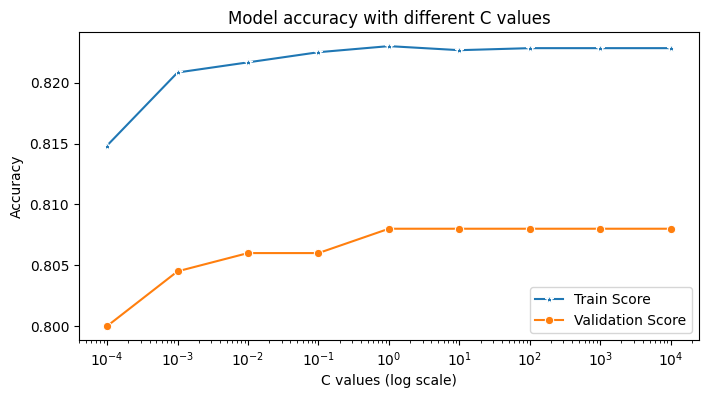

In [ ]:
from sklearn.linear_model import LogisticRegression
# Logistic regression
test_scores = []
train_scores = []
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

for c in c_values:
    model_lr = LogisticRegression(C=c, max_iter=20000).fit(X_final_train_base, y_final_train)
    train_scores.append(model_lr.score(X_final_train_base, y_final_train))
    test_scores.append(model_lr.score(X_final_val_base, y_final_val))

plt.figure(figsize=(8, 4))
sns.lineplot(x=c_values, y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=c_values, y=test_scores, marker='o', label='Validation Score')

plt.xscale("log")
plt.xlabel("C values (log scale)")
plt.ylabel("Accuracy")
plt.title("Model accuracy with different C values")
plt.legend()
plt.show()

In [ ]:
model_lr = LogisticRegression(C=3, max_iter=10000).fit(X_final_train_base, y_final_train)
print("Validation set score:{:.4f}".format(model_lr.score(X_final_val_base, y_final_val)))

Validation set score:0.8080


In [ ]:
lr = LogisticRegression(C=3,max_iter=10000)
logit_mod = lr.fit(X_final_train_base, y_final_train)

conf_mat = confusion_matrix(y_final_val, lr.predict(X_final_val_base))
print(conf_mat)
print('Accuracy =', lr.score(X_final_val_base,y_final_val))

[[859 184]
 [200 757]]
Accuracy = 0.808


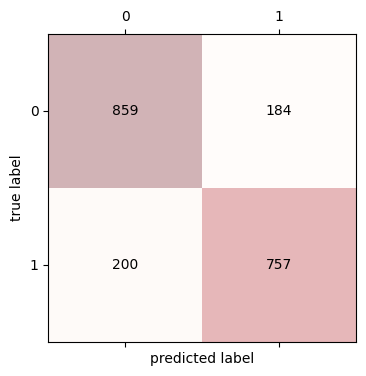

              precision    recall  f1-score   support

           0      0.811     0.824     0.817      1043
           1      0.804     0.791     0.798       957

    accuracy                          0.808      2000
   macro avg      0.808     0.807     0.807      2000
weighted avg      0.808     0.808     0.808      2000



In [ ]:
# Confusion matrix plot y Raschka (2014)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_mat, cmap=plt.cm.Reds, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i,
        s=conf_mat[i, j],
        va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

# Other metrics
print(classification_report(y_final_val, lr.predict(X_final_val_base), digits=3))

### 4.3.1 L1 Regularization

We then try the logistic regression model with L1 regularization. The best regularization parameter is found with 10-fold cross validation. With candidate regularization parameter [0.001,0.01,0.1,0.5,0.9,1,3,5,10], we found regularization parameter of 0.1 had the highest average accuracy in the 10-fold cross validation. We can see that it has slightly better performance than the one without regularization.

In [ ]:
LRPipeline1 = Pipeline([( 'LogReg', LogisticRegression(penalty = 'l1', solver = 'liblinear')) ])
params = { 'LogReg__C': [0.001,0.01,0.1,0.5,0.9,1,3,5,10]}
GSLR1 = GridSearchCV(LRPipeline1, params, cv=10, scoring='accuracy')

In [ ]:
GSLR1.fit(X_final_train_base,y_final_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('LogReg',
                                        LogisticRegression(penalty='l1',
                                                           solver='liblinear'))]),
             param_grid={'LogReg__C': [0.001, 0.01, 0.1, 0.5, 0.9, 1, 3, 5,
                                       10]},
             scoring='accuracy')

In [ ]:
# Fetching the best parameters for Model building
GSLR1.best_params_

{'LogReg__C': 0.1}

In [ ]:
pred = GSLR1.predict(X_final_val_base)
func_calConfusionMatrix(pred.reshape(-1,1), y_final_val)

Accuracy is 0.804
+-----+--------+--------+
|     | yhat=1 | yhat=0 |
+-----+--------+--------+
| y=1 |  752   |  205   |
| y=0 |  187   |  856   |
+-----+--------+--------+
Precision for positive is 0.8008519701810437
Precision for negative is 0.8067860508953817
Recall for positive is 0.7857889237199582
Recall for negative is 0.8207094918504314


[[856 187]
 [205 752]]
Accuracy = 0.804


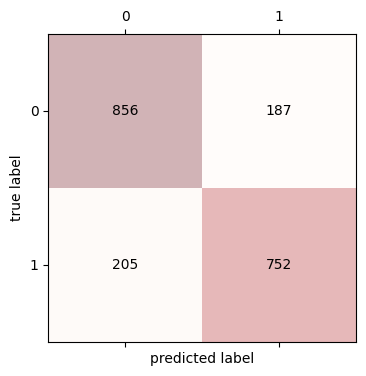

              precision    recall  f1-score   support

           0      0.807     0.821     0.814      1043
           1      0.801     0.786     0.793       957

    accuracy                          0.804      2000
   macro avg      0.804     0.803     0.803      2000
weighted avg      0.804     0.804     0.804      2000



In [ ]:
# Confusion matrix plot y Raschka (2014)
conf_mat = confusion_matrix(y_final_val, GSLR1.predict(X_final_val_base))
print(conf_mat)
print('Accuracy =', GSLR1.score(X_final_val_base,y_final_val))

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_mat, cmap=plt.cm.Reds, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i,
        s=conf_mat[i, j],
        va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

# Other metrics
print(classification_report(y_final_val, GSLR1.predict(X_final_val_base), digits=3))

### 4.3.4 L2 Regularization

Finally, we try the logistic regression model with L2 regularization. With the same candidate set of regularization parameters, the 10-fold cross validation found regularization parameter of 0.001 is the best. The evaluation matrix for this model is shown. It has the best performance.

In [ ]:
LRPipeline2 = Pipeline([( 'LogReg', LogisticRegression(penalty = 'l2'))])
params = { 'LogReg__C': [0.001,0.01,0.1,0.5,0.9,1,3,5,10]}
GSLR2 = GridSearchCV(LRPipeline2, params, cv=10, scoring='accuracy')
GSLR2.fit(X_final_train_base,y_final_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('LogReg', LogisticRegression())]),
             param_grid={'LogReg__C': [0.001, 0.01, 0.1, 0.5, 0.9, 1, 3, 5,
                                       10]},
             scoring='accuracy')

In [ ]:
# Fetching the best parameters for Model building
GSLR2.best_params_

{'LogReg__C': 0.001}

In [ ]:
pred = GSLR2.predict(X_final_val_base)
func_calConfusionMatrix(pred.reshape(-1,1), y_final_val)

Accuracy is 0.8045
+-----+--------+--------+
|     | yhat=1 | yhat=0 |
+-----+--------+--------+
| y=1 |  737   |  220   |
| y=0 |  171   |  872   |
+-----+--------+--------+
Precision for positive is 0.8116740088105727
Precision for negative is 0.7985347985347986
Recall for positive is 0.7701149425287356
Recall for negative is 0.8360498561840843


No Regularizatin AUC: 0.898
L1 AUC: 0.898
L2 AUC: 0.896


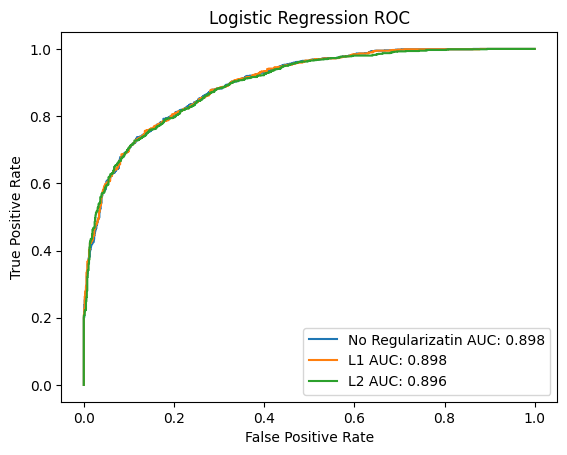

In [ ]:
from sklearn.metrics import roc_curve, auc

def drow_one_roc(prediction, label):
    false_pos_rate, true_pos_rate, _ = roc_curve(y_final_val, prediction[:, 1], pos_label = 1)
    auc_v = auc(false_pos_rate,true_pos_rate)
    plt.plot(false_pos_rate, true_pos_rate, label = label + " AUC: %.3f" % auc_v)
    print(label + " AUC: %.3f" % auc_v)


def draw_all_roc(models, title):

    for model, label in models:
        drow_one_roc(model.predict_proba(X_final_val_base), label)

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.title(title)


draw_all_roc( [ (logit_mod, "No Regularizatin"), (GSLR1, 'L1'), (GSLR2, 'L2')], 'Logistic Regression ROC')

To further evaluate their performance, we also plot the ROC curve of these 3 logistic regression models. We can see that these 3 models have very similar performance, they have almost the same ROC curve.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

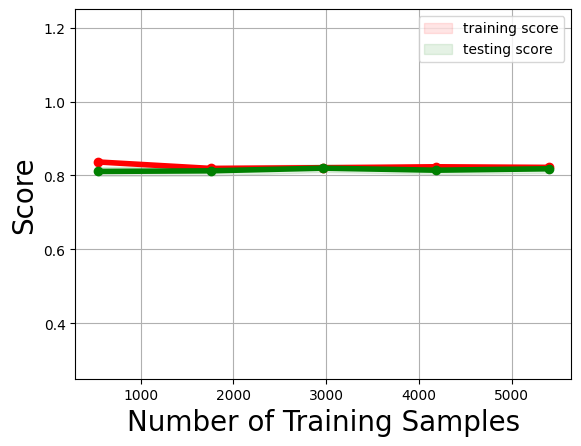

In [ ]:
plot_learning_curve (GSLR2, X_final_train_base, y_final_train, ylim = (0.25, 1.25), cv = 10,
n_jobs = 4)

The learning curve indicates a stable and well-generalized model, with training and validation scores closely aligned and consistent across different sample sizes. The flatness of the curve suggests that the model has already captured the underlying patterns in the data, and further increasing the training data may not yield significant improvement.

## 4.4 KNN

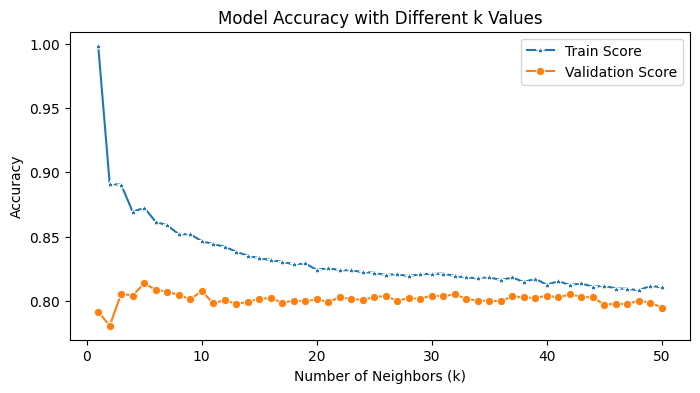

In [ ]:
test_scores = []
train_scores = []

for k in range(1, 51):

    model_knn = KNeighborsClassifier(n_neighbors = k).fit(X_final_train_base,y_final_train)
    train_scores.append(model_knn.score(X_final_train_base,y_final_train))
    test_scores.append(model_knn.score(X_final_val_base,y_final_val))
    #print(model_knn.score(X_valid,y_valid))

plt.figure(figsize=(8, 4))
sns.lineplot(x=range(1, 51), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1, 51), y=test_scores, marker='o', label='Validation Score')

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Model Accuracy with Different k Values")
plt.legend()
plt.show()

In [ ]:
k_ = []
for k in range(1, 51):
    k_.append(k)

In [ ]:
d = {'K': k_, 'accuracy_rate': test_scores}
df = pd.DataFrame(d)
df[df['accuracy_rate']==df['accuracy_rate'].max()]

,K,accuracy_rate
4,5,0.8135


In [ ]:
knn_high = KNeighborsClassifier(n_neighbors = 5)
knn_high.fit(X_final_train_base, y_final_train)
accuracy_high = knn_high.score(X_final_val_base, y_final_val)

In [ ]:
pred_knn_yhigh = knn_high.predict(X_final_val_base)
pred_knn_y_high = pred_knn_yhigh.reshape(-1, 1)
# Confusion Matrix of KNN(when k = 9)
func_calConfusionMatrix(pred_knn_y_high, y_final_val)

Accuracy is 0.8135
+-----+--------+--------+
|     | yhat=1 | yhat=0 |
+-----+--------+--------+
| y=1 |  781   |  176   |
| y=0 |  197   |  846   |
+-----+--------+--------+
Precision for positive is 0.7985685071574642
Precision for negative is 0.8277886497064579
Recall for positive is 0.8160919540229885
Recall for negative is 0.8111217641418984


[[846 197]
 [176 781]]
Accuracy = 0.8135


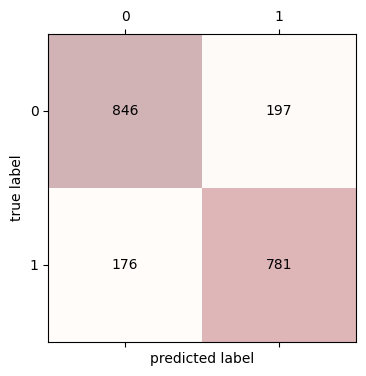

              precision    recall  f1-score   support

           0      0.828     0.811     0.819      1043
           1      0.799     0.816     0.807       957

    accuracy                          0.814      2000
   macro avg      0.813     0.814     0.813      2000
weighted avg      0.814     0.814     0.814      2000



In [ ]:
# Confusion matrix plot y Raschka (2014)
conf_mat = confusion_matrix(y_final_val, pred_knn_y_high)
print(conf_mat)
print('Accuracy =', knn_high.score(X_final_val_base,y_final_val))

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_mat, cmap=plt.cm.Reds, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i,
        s=conf_mat[i, j],
        va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

# Other metrics
print(classification_report(y_final_val, knn_high.predict(X_final_val_base), digits=3))

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

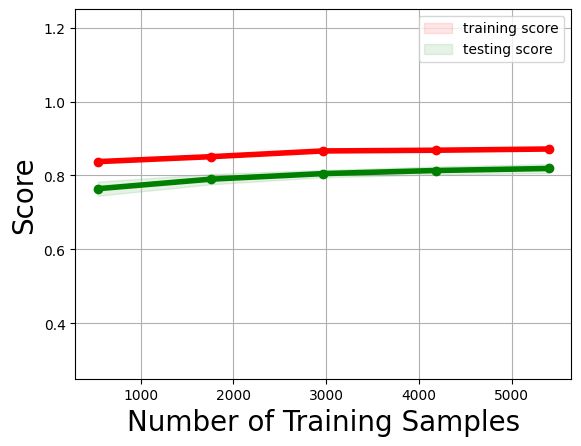

In [ ]:
# Learning Curve of KNN(when k = 5)
plot_learning_curve (knn_high, X_final_train_base, y_final_train,  ylim = (0.25, 1.25), cv = 10,
n_jobs = 4)

In [ ]:
def plot_roc_curve(model, X_test, y_test,model_name=None, figsize=(8, 6)):
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    import numpy as np


    y_scores = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_scores)

    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=figsize)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model_name)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return roc_auc

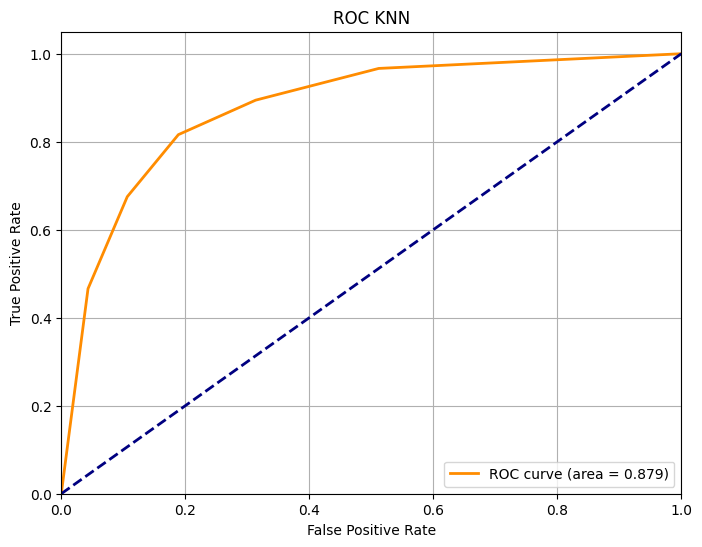

ROC AUC: 0.8788


In [ ]:
roc_auc = plot_roc_curve(knn_high, X_final_val_base, y_final_val, model_name='ROC KNN')
print(f"ROC AUC: {roc_auc:.4f}")

The KNN model shows a moderate overfitting pattern, as the training score remains higher than the validation score. However, both scores improve slightly as more training data is added, indicating enhanced generalization. The performance is generally good.

## 4.5 RandomForest

Random forest is an ensemble method consisting of multiple decision trees. Each tree is trained with a random sample of original training samples with replacement. In each split, it only considers a random subset of the features as candidate splitting point instead of considering all features. With this randomness, the decision trees of the random forest tend to be uncorrelated. It helps improve the prediction accuracy and make random forest less prone to overfitting.

In [ ]:
# Fitting Random Forest Classification to the Training set
classifier_rf1 = RandomForestClassifier(n_estimators = 20, max_depth = 10)
classifier_rf1.fit(X_final_train_base , y_final_train)
#predict the test sets result
y_pred_rf1 = classifier_rf1.predict(X_final_val_base)
func_calConfusionMatrix(y_pred_rf1.reshape(-1,1), y_final_val)

Accuracy is 0.8005
+-----+--------+--------+
|     | yhat=1 | yhat=0 |
+-----+--------+--------+
| y=1 |  713   |  244   |
| y=0 |  155   |  888   |
+-----+--------+--------+
Precision for positive is 0.8214285714285714
Precision for negative is 0.784452296819788
Recall for positive is 0.7450365726227796
Recall for negative is 0.8513902205177373


We first train a simple random forest classifier with 20 trees and maximum depth of 20. It achieves validation accuracy of 0.8005. The evaluation matrix for this model is shown above.

Then we use 10-fold cross validation to select parameters with the highest average validation accuracy. The candidate number of decision tree is 10, 50, 100 and 200. The candidate splitting criterion is Gini and entropy, the candidate maximum depth is 10, 50, 80, 100 and 200. The candidate maximum features are log and square root of total number of features.

The best parameters selected are 200 decision trees with maximum depth of 80 which considers square root of total number of features and uses entropy as metric in splitting. With this parameter tuning, we achieve validation accuracy of 0.837, which is a big improvement on untuned random forest model and other models.

In [ ]:
# Grid Search
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state = 2)
parameters_rf = {'criterion': ['gini','entropy'],
                 'min_samples_split': [4,6,8],
                 'n_estimators': [10, 50,100,200],
                 'max_depth': [10,50,80,100,200],
                 'max_features': ["sqrt", "log2"]
                 }
clf1 = GridSearchCV(rfc, parameters_rf, cv = 10, scoring='accuracy')
clf1.fit(X_final_train_base, y_final_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=2),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 50, 80, 100, 200],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [ ]:
print(clf1.best_params_)

{'criterion': 'entropy', 'max_depth': 80, 'max_features': 'log2', 'min_samples_split': 4, 'n_estimators': 200}


In [ ]:
pred = clf1.predict(X_final_val_base)
func_calConfusionMatrix(pred.reshape(-1,1), y_final_val)

Accuracy is 0.837
+-----+--------+--------+
|     | yhat=1 | yhat=0 |
+-----+--------+--------+
| y=1 |  804   |  153   |
| y=0 |  173   |  870   |
+-----+--------+--------+
Precision for positive is 0.8229273285568065
Precision for negative is 0.8504398826979472
Recall for positive is 0.8401253918495298
Recall for negative is 0.8341323106423778


In [ ]:
def draw_all_roc1(models, title):

    for model, label in models:
        drow_one_roc(model.predict_proba(X_final_val), label)

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.title(title)

Untuned AUC: 0.886
Tuned AUC: 0.923


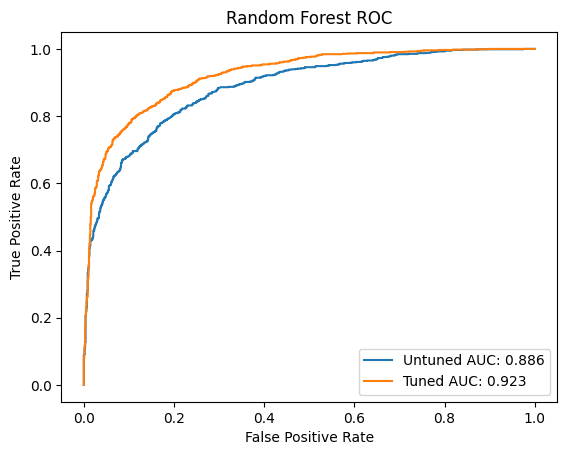

In [ ]:
draw_all_roc( [ (classifier_rf1, "Untuned"), (clf1, 'Tuned')], 'Random Forest ROC')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

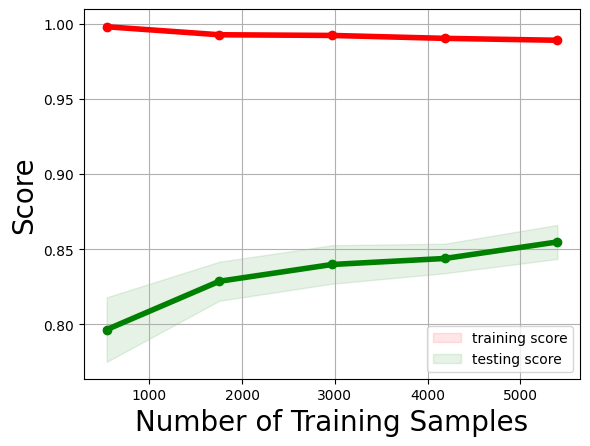

In [ ]:
plot_learning_curve(clf1.best_estimator_, X_final_train_base, y_final_train, cv=10, n_jobs=4)

The current Random Forest model fits the training data well while steadily improving on the validation data, demonstrating strong generalization capability. GridSearch tuning has effectively reduced overfitting, making this a well-balanced and production-worthy model candidate.

## 4.6 SVM

In [ ]:
import sklearn.svm as svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [ ]:
# SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': list(range(1, 21))
}

grid = GridSearchCV(SVC(max_iter=100000), param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid.fit(X_final_train_base, y_final_train)

print("Best params:", grid.best_params_)
print("Best cross-val score:", grid.best_score_)

Best params: {'C': 4, 'kernel': 'rbf'}
Best cross-val score: 0.8261666666666667


In [ ]:
best_kernel = 'rbf'
best_c = 4

# Set probability=True BEFORE training
model_svm = SVC(kernel=best_kernel, C=best_c, probability=True)
model_svm.fit(X_final_train_base, y_final_train)
print("Validation set score:{:.4f}".format(model_svm.score(X_final_val_base, y_final_val)))

Validation set score:0.8110


In [ ]:
pred_svm = model_svm.predict(X_final_val_base)
func_calConfusionMatrix(pred_svm.reshape(-1,1), y_final_val)

Accuracy is 0.811
+-----+--------+--------+
|     | yhat=1 | yhat=0 |
+-----+--------+--------+
| y=1 |  761   |  196   |
| y=0 |  182   |  861   |
+-----+--------+--------+
Precision for positive is 0.806998939554613
Precision for negative is 0.8145695364238411
Recall for positive is 0.7951933124346917
Recall for negative is 0.825503355704698


In [ ]:
def plot_roc_curve(model, X_test, y_test,model_name=None, figsize=(8, 6)):
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    import numpy as np


    y_scores = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_scores)

    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=figsize)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model_name)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return roc_auc

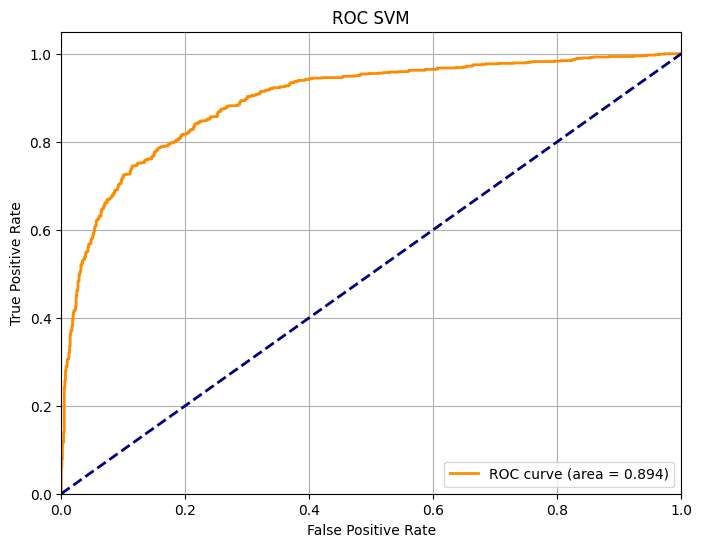

ROC AUC: 0.8941


In [ ]:
roc_auc = plot_roc_curve(model_svm, X_final_val_base, y_final_val, model_name='ROC SVM')
print(f"ROC AUC: {roc_auc:.4f}")

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

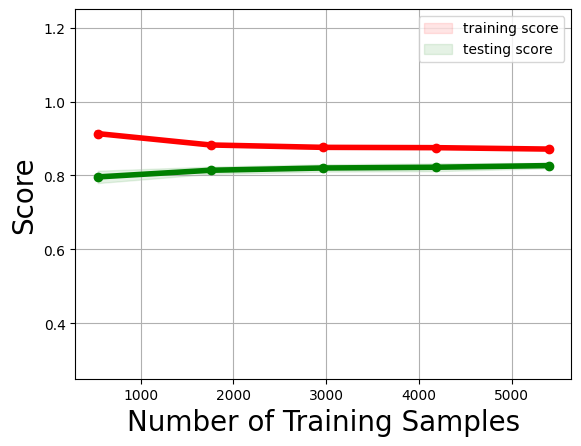

In [ ]:
plot_learning_curve (model_svm, X_final_train_base, y_final_train, ylim = (0.25, 1.25), cv = 10,
n_jobs = 4)

The current SVM model (with RBF kernel and C=4) demonstrates a strong fit with no signs of overfitting. The training score is high and stable, while the validation score continues to improve slightly with more data. This is a well-generalized model suitable for final reporting and deployment.

## 4.7 Feed-Forward Neural Network (TensorFlow)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LambdaCallback
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU

import matplotlib.pyplot as plt

log_callback = LambdaCallback(
    on_epoch_end=lambda epoch, logs: print(
        f"Epoch {epoch+1}: loss={logs['loss']:.4f}, val_loss={logs['val_loss']:.4f}, "
        f"acc={logs['accuracy']:.4f}, val_acc={logs['val_accuracy']:.4f}"
    ) if (epoch + 1) % 5 == 0 else None
)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

fnn = tf.keras.Sequential([
    Dense(128, kernel_regularizer=regularizers.l2(0.001), input_shape=(80,)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),

    Dense(64, kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),

    Dense(32, kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),

    Dense(1, activation='sigmoid')
])

fnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy', threshold=0.5)]
)


fnn.fit(
    X_final_train_base, y_final_train,
    validation_data=(X_final_val_base, y_final_val),
    batch_size=64,
    epochs=100,
    verbose=0,
    callbacks=[log_callback, early_stop, lr_scheduler]
)

pred_fnn_basic = fnn.predict(X_final_val_base)
y_pred_fnn_basic = pred_fnn_basic.round()

print('begin evaluation')
test_loss, test_acc = fnn.evaluate(X_final_val_base, y_final_val, verbose=1)

Epoch 5: loss=0.8683, val_loss=0.7543, acc=0.6340, val_acc=0.7705
Epoch 10: loss=0.7463, val_loss=0.6642, acc=0.7282, val_acc=0.7955
Epoch 15: loss=0.6981, val_loss=0.6233, acc=0.7687, val_acc=0.8005
Epoch 20: loss=0.6581, val_loss=0.6020, acc=0.7865, val_acc=0.8020
Epoch 25: loss=0.6280, val_loss=0.5893, acc=0.7967, val_acc=0.8005
Epoch 30: loss=0.6115, val_loss=0.5788, acc=0.8002, val_acc=0.8035
Epoch 35: loss=0.6004, val_loss=0.5694, acc=0.8057, val_acc=0.8040
Epoch 40: loss=0.5783, val_loss=0.5604, acc=0.8092, val_acc=0.8055
Epoch 45: loss=0.5754, val_loss=0.5525, acc=0.8143, val_acc=0.8050
Epoch 50: loss=0.5584, val_loss=0.5441, acc=0.8130, val_acc=0.8045
Epoch 55: loss=0.5404, val_loss=0.5359, acc=0.8180, val_acc=0.8065
Epoch 60: loss=0.5368, val_loss=0.5281, acc=0.8202, val_acc=0.8080
Epoch 65: loss=0.5308, val_loss=0.5204, acc=0.8210, val_acc=0.8105
Epoch 70: loss=0.5212, val_loss=0.5134, acc=0.8210, val_acc=0.8120
Epoch 75: loss=0.5096, val_loss=0.5069, acc=0.8198, val_acc=0.8

In [ ]:
# Confusion Matrix of FNN
func_calConfusionMatrix(y_pred_fnn_basic,y_final_val)

Accuracy is 0.812
+-----+--------+--------+
|     | yhat=1 | yhat=0 |
+-----+--------+--------+
| y=1 |  768   |  189   |
| y=0 |  187   |  856   |
+-----+--------+--------+
Precision for positive is 0.8041884816753927
Precision for negative is 0.8191387559808613
Recall for positive is 0.8025078369905956
Recall for negative is 0.8207094918504314


Epoch 5: loss=0.4576, val_loss=0.4692, acc=0.8302, val_acc=0.8105
Epoch 10: loss=0.4546, val_loss=0.4664, acc=0.8268, val_acc=0.8095
Epoch 15: loss=0.4473, val_loss=0.4628, acc=0.8290, val_acc=0.8115
Epoch 20: loss=0.4437, val_loss=0.4580, acc=0.8283, val_acc=0.8130
Epoch 25: loss=0.4368, val_loss=0.4548, acc=0.8322, val_acc=0.8100

Epoch 29: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
Epoch 30: loss=0.4314, val_loss=0.4528, acc=0.8338, val_acc=0.8080


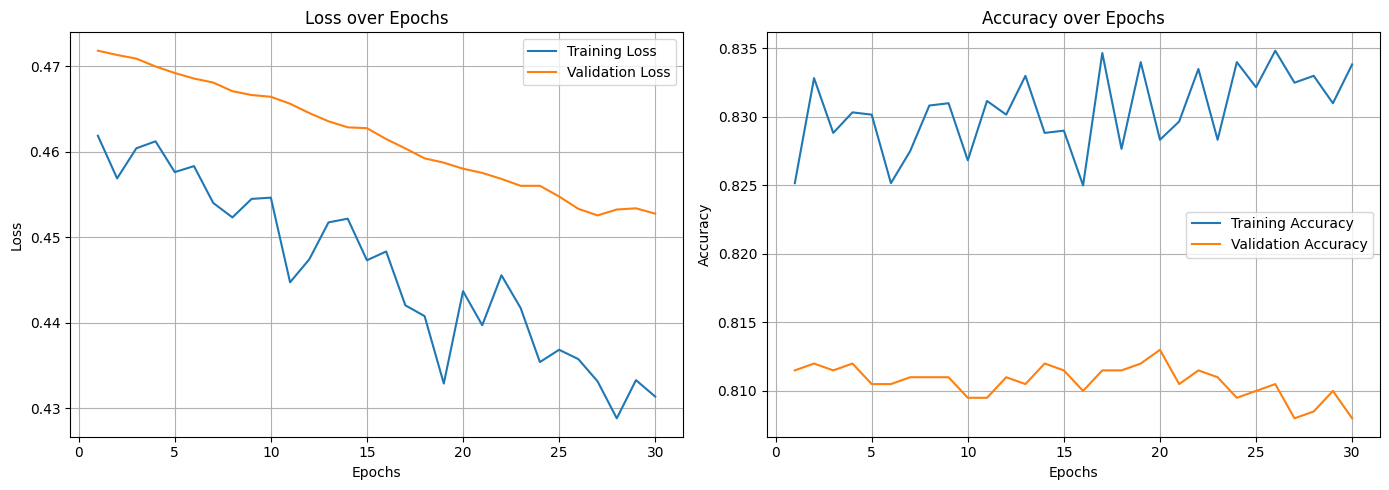

In [ ]:
# Training History
history = fnn.fit(
    X_final_train_base, y_final_train,
    validation_data=(X_final_val_base, y_final_val),
    batch_size=64,
    epochs=100,
    verbose=0,
    callbacks=[log_callback, early_stop, lr_scheduler]
)

history_dict = history.history
epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(14, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['loss'], label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['accuracy'], label='Training Accuracy')
plt.plot(epochs, history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 4.8 XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')  # Clean XGBoost warning

# Step 1: Define parameter grid
param_grid = {
    'max_depth': [4, 6, 8],
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Step 2: Set up the base model
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Step 3: Set up the GridSearchCV
grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # you can change to 'f1' or 'roc_auc'
    verbose=1,
    n_jobs=-1
)

# Step 4: Fit on training data
grid_xgb.fit(X_final_train_base, y_final_train)

# Step 5: Retrieve the best model
best_xgb = grid_xgb.best_estimator_
print("Best Parameters:", grid_xgb.best_params_)
print("Best CV Accuracy: {:.4f}".format(grid_xgb.best_score_))

# Step 6: Evaluate on validation set
y_pred_xgb = best_xgb.predict(X_final_val_base)
print("\n XGBoost Classification Report on Validation Set:")
print(classification_report(y_final_val, y_pred_xgb, digits=4))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200}
Best CV Accuracy: 0.8638

 XGBoost Classification Report on Validation Set:
              precision    recall  f1-score   support

           0     0.8630    0.8456    0.8542      1043
           1     0.8354    0.8537    0.8444       957

    accuracy                         0.8495      2000
   macro avg     0.8492    0.8497    0.8493      2000
weighted avg     0.8498    0.8495    0.8496      2000



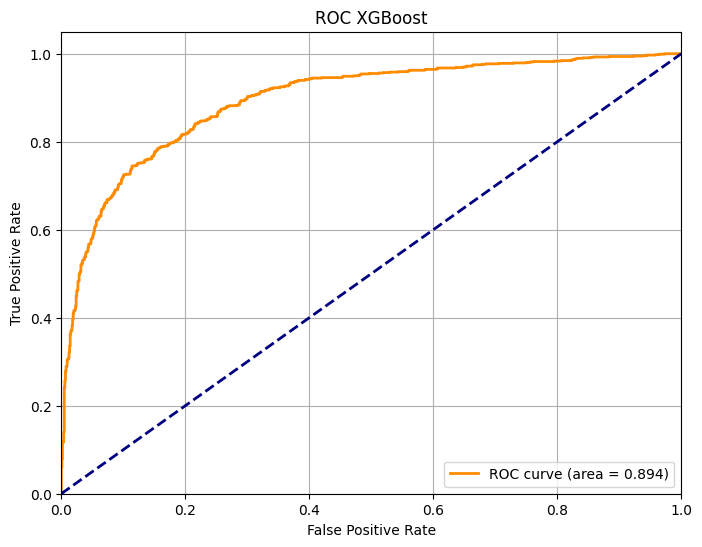

ROC AUC: 0.8941


In [ ]:
roc_auc = plot_roc_curve(model_svm, X_final_val_base, y_final_val, model_name='ROC XGBoost')
print(f"ROC AUC: {roc_auc:.4f}")

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

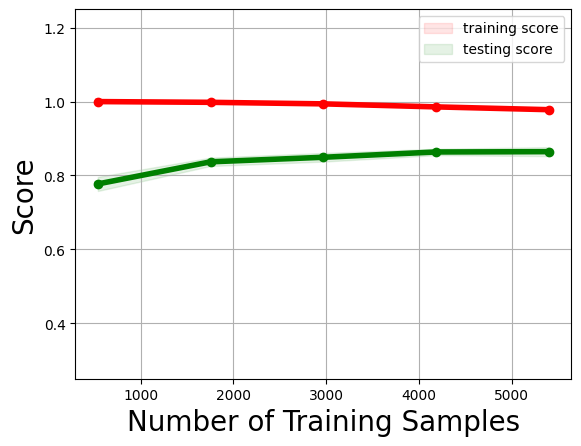

In [ ]:
plot_learning_curve (best_xgb, X_final_train_base, y_final_train, ylim = (0.25, 1.25), cv = 10,
n_jobs = 4)

## **4.8 Soft Voting Ensemble**

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# === Step 1: Get prediction probabilities from all models ===

# Random Forest
proba_rf = clf1.predict_proba(X_final_val_base)[:, 1]

# SVM (must have probability=True during training)
proba_svm = model_svm.predict_proba(X_final_val_base)[:, 1]

# KNN
proba_knn = knn_high.predict_proba(X_final_val_base)[:, 1]

# Logistic Regression
proba_logreg = GSLR2.predict_proba(X_final_val_base)[:, 1]

# FNN
proba_fnn = fnn.predict(X_final_val_base).flatten()

# XGBoost
proba_xgb = best_xgb.predict_proba(X_final_val_base)[:, 1]

# === Step 2: Weighted soft voting ===
# Define weights based on model performance
w_rf = 0.35
w_xgb = 0.60
w_fnn = 0.00
w_svm = 0.00
w_knn = 0.05
w_logreg = 0.00

# adjust these weights based on observed validation accuracy
ensemble_proba = (
    w_rf * proba_rf +
    w_xgb * proba_xgb +
    w_fnn * proba_fnn +
    w_svm * proba_svm +
    w_knn * proba_knn +
    w_logreg * proba_logreg
)

# Convert to final prediction
ensemble_pred = (ensemble_proba >= 0.5).astype(int)

# === Step 3: Evaluation ===
print("Ensemble Accuracy:", accuracy_score(y_final_val, ensemble_pred))
print("Classification Report:\n", classification_report(y_final_val, ensemble_pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Ensemble Accuracy: 0.8515
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86      1043
           1       0.84      0.86      0.85       957

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



# Conclusion

## Model Comparison

In [ ]:
# Define model names
model_names = ["Logistic Regression (GSLR2)", "KNN (k=5)", "Random Forest (GridSearch)",
               "SVM (GridSearch)", "FNN", "XGBoost", "Ensemble"]

# Define predictions and true labels
y_true = y_final_val.ravel()

# Predictions for each model
y_pred_logreg = GSLR2.predict(X_final_val_base).ravel()
y_pred_knn = knn_high.predict(X_final_val_base).ravel()
y_pred_rf = clf1.predict(X_final_val_base).ravel()
y_pred_svm = model_svm.predict(X_final_val_base).ravel()
y_pred_fnn = y_pred_fnn_basic.ravel()
y_pred_xgb = best_xgb.predict(X_final_val_base).ravel()
y_pred_ensemble = ensemble_pred.ravel()

model_names = [
    "Logistic Regression (GSLR2)",
    "KNN (k=5)",
    "Random Forest (GridSearch)",
    "SVM",
    "FNN",
    "XGBoost",
    "Ensemble"
]

predictions = [
    y_pred_logreg,
    y_pred_knn,
    y_pred_rf,
    y_pred_svm,
    y_pred_fnn,
    y_pred_xgb,
    y_pred_ensemble
]

report_data = []
for name, pred in zip(model_names, predictions):
    report = classification_report(y_true, pred, output_dict=True, zero_division=0)
    row = {
        "Model": name,
        "Accuracy": (pred == y_true).mean(),
        "Precision_Pos": report["1"]["precision"],
        "Recall_Pos": report["1"]["recall"],
        "F1_Pos": report["1"]["f1-score"],
        "Precision_Neg": report["0"]["precision"],
        "Recall_Neg": report["0"]["recall"],
        "F1_Neg": report["0"]["f1-score"]
    }
    report_data.append(row)

df_report = pd.DataFrame(report_data).set_index("Model")
print(df_report.round(4))

                             Accuracy  Precision_Pos  Recall_Pos  F1_Pos  \
Model                                                                      
Logistic Regression (GSLR2)    0.8045         0.8117      0.7701  0.7903   
KNN (k=5)                      0.8135         0.7986      0.8161  0.8072   
Random Forest (GridSearch)     0.8370         0.8229      0.8401  0.8314   
SVM                            0.8110         0.8070      0.7952  0.8011   
FNN                            0.8120         0.8042      0.8025  0.8033   
XGBoost                        0.8495         0.8354      0.8537  0.8444   
Ensemble                       0.8515         0.8354      0.8589  0.8470   

                             Precision_Neg  Recall_Neg  F1_Neg  
Model                                                           
Logistic Regression (GSLR2)         0.7985      0.8360  0.8169  
KNN (k=5)                           0.8278      0.8111  0.8194  
Random Forest (GridSearch)          0.8504      0.8341 

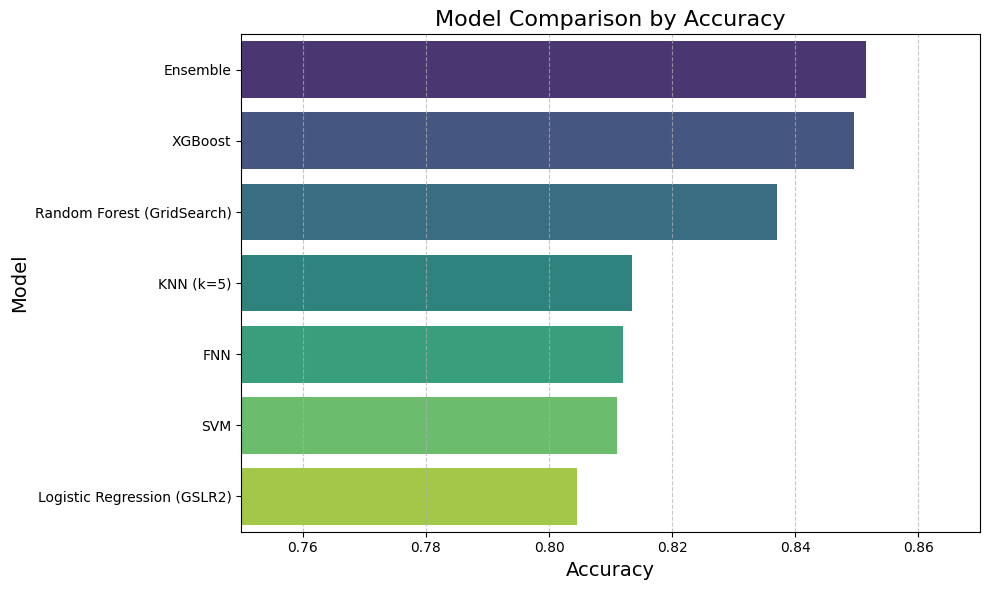

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort by Accuracy
df_sorted = df_report.sort_values(by="Accuracy", ascending=False).reset_index()

# Plot Accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(y="Model", x="Accuracy", data=df_sorted, palette="viridis")
plt.title("Model Comparison by Accuracy", fontsize=16)
plt.xlabel("Accuracy", fontsize=14)
plt.ylabel("Model", fontsize=14)
plt.xlim(0.75, 0.87)  # optional: adjust for zoomed view
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## Get prediction probabilities for Ensemble

In [ ]:
# Get probabilities from each model on test set
proba_rf_test = clf1.predict_proba(X_final_test_base)[:, 1]
proba_svm_test = model_svm.predict_proba(X_final_test_base)[:, 1]
proba_knn_test = knn_high.predict_proba(X_final_test_base)[:, 1]
proba_logreg_test = GSLR2.predict_proba(X_final_test_base)[:, 1]
proba_fnn_test = fnn.predict(X_final_test_base).flatten()
proba_xgb_test = best_xgb.predict_proba(X_final_test_base)[:, 1]

# Weighted soft voting (same weights used during validation)
ensemble_proba_test = (
    w_rf * proba_rf_test +
    w_xgb * proba_xgb_test +
    w_fnn * proba_fnn_test +
    w_svm * proba_svm_test +
    w_knn * proba_knn_test +
    w_logreg * proba_logreg_test
)

# Final prediction from Ensemble
y_pred_ensemble_test = (ensemble_proba_test >= 0.5).astype(int)

# Evaluation
print("📊 Ensemble on Test Set")
print("Accuracy:", accuracy_score(y_final_test, y_pred_ensemble_test))
print("Classification Report:\n", classification_report(y_final_test, y_pred_ensemble_test))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
📊 Ensemble on Test Set
Accuracy: 0.859
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1037
           1       0.85      0.85      0.85       963

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000

